# ¡Hola Ricardo!

Mi nombre es Sofia Arboleda, estaré ayudándote a revisar este proyecto para que quede en su mejor versión.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. Esto es útil para que te acostumbres a un escenario laboral. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo funciona esta revisión? Leeré atentamente tu código y te señalaré tus fortalezas y aquellas cosas que podemos mejorar. Los comentarios aparecerán de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si todo está perfecto y no se requieren cambios en el código.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberás hacer las correcciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si definitivamente hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma si algo no queda claro (copia este código en una celda markdown):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

**Es un gusto acompañarte en este proceso, ¡empecemos!**

## IMPORTS

In [1]:
# Abriremos todas las librerías que sabemos que nos pueden ser útiles para desarrollar el análisis de datos

import pandas as pd # Manipulación y análisis de datos
import numpy as np # Manipulación y análisis de datos
import matplotlib.pyplot as plt # Visualización de datos
import seaborn as sns # Visualización de datos
from scipy import stats # Análisis estadístico
from datetime import datetime # Para trabajar con fechas
plt.style.use('default')

### Comentario General Iteración #1
<div class="alert alert-block alert-warning">

Ricardo, quería dejarte aquí una apreciación general de tu proyecto para que a partir de allí nos vayamos punto por punto. 

Primero que nada, bienvenid@ a este mundo de los datos, va a ser un camino muy interesante y lleno de aprendizajes significativos. Espero que lo disfrutes y puedas hacerte muchas preguntas que te lleven a analizar y ver los datos como si fueran historias, porque al final, ese es nuestro objetivo!

Respecto a tu trabajo en esta primera iteración, has mostrado tus conocimientos de la mejor forma, utilizando los metodos correctamente, realizando filtros de forma sencilla y trabajando con las pruebas estadisticas en el dataset para llegar a las respuestas de negocio que se buscaban en este proyecto. Solo quedaron algunos puntos a mejorar en terminos del orden y el analisis proporcionado, ten cuidado con el uso de IA, recuerda nunca dejarlo como unica respuesta sino solo como una herramienta inicial, tu analisis propio es lo más importante
Sigue aprendiendo bastante en este camino!
</div>

## PASO 1 y 2 - EDA (Exploratory Data Analysis) + Preparación de Datos


# Exploración y Limpieza


In [2]:
# Cargamos el csv 
df = pd.read_csv('/datasets/games.csv')

In [3]:
print(df.shape)

(16715, 11)


In [4]:
# Aplicamos el método info() para conocer la estructura general 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Campos que necesitan convertirse:
* Year_of_release: El tipo de dato deberá representarse como un entero, no es necesario que sea como datetime ya que no tenemos información de día o mes.
* User_Score: La variable para representar el score es continua, por lo tanto, el tipo de dato debe ser flotante

Pero primero exploremos la estructura e identifiquemos cuántos nulos existen por columna

In [5]:
# Después aplicamos el método head() para obtener una muestra y darnos una idea de los primeros aspectos a corregir
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Convertimos nombres de columnas a minúsculas y eliminamos espacios en caso de que existan

In [6]:
# Cambiamos a minúsculas los nombres de las columnas para estandarizar y por si hubiera espacios, los eliminamos
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Ahora si. Realizamos la conversión de year_of_release y de user_score. Esto lo hacemos ya que necesitaremos que tengan este tipo de datos para el procesaiento del análisis de sus datos.

In [7]:
# Convertimos tipo de datos de year_of_release y de user_score
# Para ambos se usa errors='coerce' para permitir el uso de NaN
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64') # Se usa 'Int64' con I mayúscula para mantener los valores NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [8]:
# Verificamos cuántos valores nulos tiene el DataFrame
df.isna().sum() #Para verificar cuántos nulos tenemos en total e identificarlos por columna

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Podemos observar en la lista que las columnas que contienen más datos nulos son:
* year_of_release # Tipo Int64
* critic_score # Tipo float64
* user_score # Tipo float64
* rating # Tipo object


Creamos una columna que sume las ventas totales por juego y por región y la titulamos "global_sales"

In [9]:
# Crear la columna global_sales sumando todas las ventas regionales
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.global_sales

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: global_sales, Length: 16715, dtype: float64

Exploremos si algún juego tiene valores en "0" en todas las regiones

In [10]:
# Juegos con ventas de 0 en todas las regiones
sin_ventas = df[(df['na_sales'] == 0.0) & 
                     (df['eu_sales'] == 0.0) & 
                     (df['jp_sales'] == 0.0) & 
                     (df['other_sales'] == 0.0)]
print(f"Juegos con 0 ventas en todas las regiones: {len(sin_ventas)}")

Juegos con 0 ventas en todas las regiones: 2


Observamos que solo 2 videojuegos no tienen ventas en ningúna región.

Vamos a explorar los siguientes casos.
"Juegos sin métricas de calidad pero con ventas"

In [11]:
#Juegos sin méticas registradas de calidad
juegos_sin_metricas = df[(df['critic_score'].isna()) & 
                  (df['user_score'].isna()) & 
                  (df['rating'].isna())]

print(f"Juegos sin métricas de calidad: {len(juegos_sin_metricas)}")
print("Top 10 por ventas:")
juegos_sin_metricas.nlargest(10, 'global_sales')[['name', 'global_sales', 'year_of_release']]

Juegos sin métricas de calidad: 6667
Top 10 por ventas:


,name,global_sales,year_of_release
1,Super Mario Bros.,40.24,1985
4,Pokemon Red/Pokemon Blue,31.38,1996
5,Tetris,30.26,1989
9,Duck Hunt,28.31,1984
10,Nintendogs,24.67,2005
12,Pokemon Gold/Pokemon Silver,23.09,1999
18,Super Mario World,20.62,1990
20,Pokemon Diamond/Pokemon Pearl,18.24,2006
21,Super Mario Land,18.14,1989
22,Super Mario Bros. 3,17.28,1988


Observamos que hay un total de 6667 videojuegos que no tienen registro de métricas de calidad. Esto puede significar varias cosas:
* Pueden ser videojuegos que apenas salieron y necesitan más tiempo para ser experimentados
* Pueden ser juegos muy antiguos y aún no había forma de calificarlos
* El segmento de población que ha comprado estos juegos, no suelen darse el tiempo de calificarlos

A continuación, analizamos las columnas que contengan valores tipo object para identificar si detectamos precencia del valor "TBD" (to be determined). 

In [12]:
# Ejemplo: buscar en la columna 'name'
tbd_en_name = df['name'].str.contains('TBD', case=False, na=False).sum()
print(f"Valores 'TBD' en name: {tbd_en_name}")

# Ver los valores únicos para confirmar
print(df['name'].value_counts())

Valores 'TBD' en name: 0
Need for Speed: Most Wanted              12
LEGO Marvel Super Heroes                  9
Ratatouille                               9
Madden NFL 07                             9
FIFA 14                                   9
                                         ..
Zoids Dash                                1
Medieval Moves: Deadmund's Quest          1
Army Men World War: Team Assault          1
Super Robot Taisen Compact 2 Dai-1-Bu     1
Alleyway                                  1
Name: name, Length: 11559, dtype: int64


In [13]:
# Ejemplo: buscar en la columna 'platform'
tbd_en_platform = df['platform'].str.contains('TBD', case=False, na=False).sum()
print(f"Valores 'TBD' en platform: {tbd_en_platform}")

# Ver los valores únicos para confirmar
print(df['platform'].value_counts())

Valores 'TBD' en platform: 0
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


In [14]:
# Ejemplo: buscar en la columna 'genre'
tbd_en_genre = df['genre'].str.contains('TBD', case=False, na=False).sum()
print(f"Valores 'TBD' en genre: {tbd_en_genre}")

# Ver los valores únicos para confirmar
print(df['genre'].value_counts())

Valores 'TBD' en genre: 0
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


In [15]:
# Usamos value_counts para detectar cuantas veces se encuentra un valor repetido
df.name.value_counts()

Need for Speed: Most Wanted              12
LEGO Marvel Super Heroes                  9
Ratatouille                               9
Madden NFL 07                             9
FIFA 14                                   9
                                         ..
Zoids Dash                                1
Medieval Moves: Deadmund's Quest          1
Army Men World War: Team Assault          1
Super Robot Taisen Compact 2 Dai-1-Bu     1
Alleyway                                  1
Name: name, Length: 11559, dtype: int64

In [16]:
# Ejemplo: buscar en la columna 'rating'
tbd_en_rating = df['rating'].str.contains('TBD', case=False, na=False).sum()
print(f"Valores 'TBD' en rating: {tbd_en_rating}")

# Ver los valores únicos para confirmar
print(df['rating'].value_counts())

Valores 'TBD' en rating: 0
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


Con este recorrido, concluimos que no existe el valor de "TBD" (to be determined) en ninguna columna con valores tipo object

CONCLUSIONES DEL PASO 1:

Reflexión:
* Analizamos la información que contiene cada columna.
* Obtuvimos los nulos que tiene cada columna
* Detectamos las columnas que nos servirían para medir el éxito

Detectamos juegos con altas ventas pero sin puntuaciones. Esto genera el siguiente dilema:
- Un juego exitoso comercialmente pero sin reseñas
- Un juego de nicho con ventas altas pero pocos críticos
- Un juego reciente sin suficientes reseñas aún

Nos preguntamos, ¿Cómo definiremos éxito en el análisis?:
- Éxito = Solo ventas altas → Conservar esos juegos
- Éxito = Combinación de ventas + calidad (puntuaciones) → Decisión más compleja
- Éxito = Múltiples métricas

Tomamos la decisión de relaizar un análisis que nos permita definir éxito mediante el procesamiento de la información combinando ventas + calidad.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hiciste un buen uso de la conversion a numeros `to_numeric` y el reemplazo de los valores no convertibles por NaN. Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.

Tu solución de mantener las columnas con estos valores nulos está muy bien, en especial considerando los porcentajes que representan en los casos de las columnas `critic_score` y `user_score`, donde se generarían sesgos significativos con reemplazo de valores nulos. 

También realizaste un calculo adecuado de las ventas totales. 
</div></div>

## PASO 3 - Analizando los datos

Columnas calve para medir el éxito de un videojuego:
* global_sales
* critic_score
* user_score
* rating

Vamos a segmentar por:
- Juegos completos
- Juegos sin métricas
- Juegos parciales

In [17]:
# Juegos completos
juegos_completos = df.dropna(subset=['critic_score', 'user_score', 'rating'])

In [18]:
# Juegos sin métricas
juegos_sin_metricas = df[(df['critic_score'].isna()) & (df['user_score'].isna()) & (df['rating'].isna())]

In [19]:
# Juegos con métricas parciales completas de calidad
juegos_parciales = df[~df.index.isin(juegos_completos.index) & 
                      ~df.index.isin(juegos_sin_metricas.index)]


In [20]:
print("Distribución de grupos:")
print(f"Juegos completos: {len(juegos_completos)}")
print(f"Juegos sin métricas: {len(juegos_sin_metricas)}")
print(f"Juegos con métricas parciales: {len(juegos_parciales)}")
print(f"Total: {len(juegos_completos) + len(juegos_sin_metricas) + len(juegos_parciales)}")

Distribución de grupos:
Juegos completos: 6947
Juegos sin métricas: 6667
Juegos con métricas parciales: 3101
Total: 16715


Observamos cómo se distribuyen los videojuegos por segmento.

Realizaremos un análisis para obetner la media de los años en donde se lanzaron los videojuegos tanto que tienen métricas completos, como sin métricas

In [21]:
# Análisis temporal por grupo
print("=== ANÁLISIS POR AÑOS ===")
print("\nJuegos completos - años más comunes:")
print(juegos_completos['year_of_release'].value_counts().head())

print("\nJuegos sin métricas - años más comunes:")
print(juegos_sin_metricas['year_of_release'].value_counts().head())

print("\n=== VENTAS PROMEDIO POR GRUPO ===")
print(f"Juegos completos: {juegos_completos['global_sales'].mean():.2f}")
print(f"Juegos sin métricas: {juegos_sin_metricas['global_sales'].mean():.2f}")
print(f"Juegos parciales: {juegos_parciales['global_sales'].mean():.2f}")

=== ANÁLISIS POR AÑOS ===

Juegos completos - años más comunes:
2008    592
2007    590
2005    562
2009    550
2006    528
Name: year_of_release, dtype: Int64

Juegos sin métricas - años más comunes:
2010    453
2008    440
2011    419
2009    408
2007    375
Name: year_of_release, dtype: Int64

=== VENTAS PROMEDIO POR GRUPO ===
Juegos completos: 0.77
Juegos sin métricas: 0.42
Juegos parciales: 0.23


Vamos a realizar la distribución de datos por plataforma

In [22]:
# Análizamos métricas por plataforma
print("=== DISTRIBUCIÓN DE MÉTRICAS POR PLATAFORMA ===")

# Creamos un resumen por plataforma
plataforma_analisis = []

for plataforma in df['platform'].unique():
    total_juegos = len(df[df['platform'] == plataforma])
    juegos_sin_metricas_count = len(juegos_sin_metricas[juegos_sin_metricas['platform'] == plataforma])
    completos_count = len(juegos_completos[juegos_completos['platform'] == plataforma])
    
    porcentaje_sin_metricas = (juegos_sin_metricas_count / total_juegos) * 100
    
    plataforma_analisis.append({
        'platform': plataforma,
        'total_juegos': total_juegos,
        'juegos_sin_metricas': juegos_sin_metricas_count,
        'completos': completos_count,
        'porcentaje_sin_metricas': porcentaje_sin_metricas
    })

# Convertimos a DataFrame y ordenamos
plataforma_df = pd.DataFrame(plataforma_analisis)
plataforma_df = plataforma_df.sort_values('porcentaje_sin_metricas', ascending=False)

print(plataforma_df.head(10))

=== DISTRIBUCIÓN DE MÉTRICAS POR PLATAFORMA ===
   platform  total_juegos  juegos_sin_metricas  completos  \
15     2600           133                  133          0   
11      N64           319                  319          0   
29       GG             1                    1          0   
28      3DO             3                    3          0   
27     TG16             2                    2          0   
26       NG            12                   12          0   
25       WS             6                    6          0   
24      SCD             6                    6          0   
23      SAT           173                  173          0   
20      GEN            29                   29          0   

    porcentaje_sin_metricas  
15                    100.0  
11                    100.0  
29                    100.0  
28                    100.0  
27                    100.0  
26                    100.0  
25                    100.0  
24                    100.0  
23        

Observamos los datos que arroja la tabla, podemos realizar una primera deducción: 
- Mientras más antigua sea la plataforma, menos probabilidad tendrá de que el videojeugo tenga registro de métrica de calidad, debido a que anteriormente, no estaban tan desarrolladas las posibilidades para compartir una reseña.
- Otro aspecto que puede tener relevancia, es sin duda que la plataforma no haya sido o no sea tan popular
- Los factores que podemos considerar que causan relevancia del porqué no hay metricas: factores tecnológicos:  No había internet masivo para reseñas online, factores temporales: Las métricas digitales (Metacritic, GameSpot, etc.) no existían  y factores industriales: Los sistemas de puntuación profesional llegaron después.

In [23]:
print(plataforma_df.tail(10))

   platform  total_juegos  juegos_sin_metricas  completos  \
9       PS4           392                  125        239   
6       PS2          2161                  680       1161   
18     WiiU           147                   42         89   
5       PS3          1331                  368        783   
0       Wii          1320                  315        491   
17     XOne           247                   53        159   
14       PC           974                  156        667   
4      X360          1262                  202        877   
19       GC           556                   87        356   
13       XB           824                   87        580   

    porcentaje_sin_metricas  
9                 31.887755  
6                 31.466913  
18                28.571429  
5                 27.648385  
0                 23.863636  
17                21.457490  
14                16.016427  
4                 16.006339  
19                15.647482  
13                10.558252 

A pesar de que no todos los juegos tienen registros de métricas de calidad, comprobamos el factor temporal, tecnológico e industrial:
- Nos damos cuenta que las consolas de videojuegos son más actuales y por ende, todas cuentan con registros de métricas
- A pesar de que no todos los juegos tienen registros de métricas de calidad, quizás se deba a la popularidad y género del videojuego. 

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

La mirada que proporcionas aquí sobre los registros y los valores faltantes de algunas metricas está muy bien contextualizada y dirigida.

# Data Analysis

Análisis estadístico: 
* Revisar la distribución de la data 
* Estadísticas, 
* Graficos 
* Revisar correlaciónes entre datos

Segmentemos. Vamos a dividir los videojuegos en 2 grupos:
- Juegos antiguos
- Juegos modernos

In [24]:
# Segmentación de juegos antiguos y juegos modernos
juegos_antiguos = df[df['year_of_release'] < 2000]  # Solo ventas
juegos_modernos = df[df['year_of_release'] >= 2000]  # Ventas + métricas

In [25]:
# Segmentar los datos por era
juegos_antiguos = df[df['year_of_release'] < 2000]
juegos_modernos = df[df['year_of_release'] >= 2000]

print("=== RESUMEN DE SEGMENTACIÓN ===")
print(f"Juegos antiguos (< 2000): {len(juegos_antiguos):,}")
print(f"Juegos modernos (≥ 2000): {len(juegos_modernos):,}")
print(f"Total: {len(df):,}")

=== RESUMEN DE SEGMENTACIÓN ===
Juegos antiguos (< 2000): 1,976
Juegos modernos (≥ 2000): 14,470
Total: 16,715


In [26]:
# Verificamos métricas disponibles por era
print("\n=== MÉTRICAS POR ERA ===")
print("Juegos antiguos - % sin métricas:")
print(f"{(juegos_antiguos['critic_score'].isna().sum() / len(juegos_antiguos) * 100):.1f}%")

print("Juegos modernos - % sin métricas:")
print(f"{(juegos_modernos['critic_score'].isna().sum() / len(juegos_modernos) * 100):.1f}%")


=== MÉTRICAS POR ERA ===
Juegos antiguos - % sin métricas:
95.1%
Juegos modernos - % sin métricas:
45.5%


- Observamos que tenemos un muy alto % de juegos sin métricas en nuestro grupo de juegos antiguos
- Vs el % de juegos sin métricas en nuestro grupo de juegos modernos

Comencemos con el análisis estadístico por segmento.
## Análisis de ventas por era

In [27]:
# Análisis de ventas por era
print("=== ANÁLISIS DE VENTAS POR ERA ===")
print("\n--- JUEGOS ANTIGUOS (< 2000) ---")
print(f"Cantidad de juegos: {len(juegos_antiguos):,}")
print(f"Ventas promedio: {juegos_antiguos['global_sales'].mean():.2f} millones")
print(f"Ventas mediana: {juegos_antiguos['global_sales'].median():.2f} millones")
print(f"Ventas máximas: {juegos_antiguos['global_sales'].max():.2f} millones")

# métricas para juegos modernos
print("\n--- JUEGOS MODERNOS (>= 2000) ---")
print(f"Cantidad de juegos: {len(juegos_modernos):,}")
print(f"Ventas promedio: {juegos_modernos['global_sales'].mean():.2f} millones")
print(f"Ventas mediana: {juegos_modernos['global_sales'].median():.2f} millones")
print(f"Ventas máximas: {juegos_modernos['global_sales'].max():.2f} millones")

=== ANÁLISIS DE VENTAS POR ERA ===

--- JUEGOS ANTIGUOS (< 2000) ---
Cantidad de juegos: 1,976
Ventas promedio: 0.84 millones
Ventas mediana: 0.30 millones
Ventas máximas: 40.24 millones

--- JUEGOS MODERNOS (>= 2000) ---
Cantidad de juegos: 14,470
Ventas promedio: 0.49 millones
Ventas mediana: 0.15 millones
Ventas máximas: 82.54 millones


Observaciones:
- De manera significativa se obtienen un total más elevados en Cantidad de Juegos en el grupo de Juegos Modernos Vs Juegos Antiguos
- Esto genera de manera lógica que tengamos números más grandes en el promedio y la mediana de Juegos Antiguos, ya que la población estadística resulta ser más pequeña que la población estadística de Juegos Modernos.
- Por ende, en Ventas Máximas de ambos segmentos, obtenemos un poco más del doble por parte de los Juegos Modernos Vs los Juegos Antiguos.

In [28]:
# Análisis de distribución de ventas
print("=== DISTRIBUCIÓN DE VENTAS POR PERCENTILES ===")
print("\n--- JUEGOS ANTIGUOS ---")
print(f"25%: {juegos_antiguos['global_sales'].quantile(0.25):.2f} millones")
print(f"75%: {juegos_antiguos['global_sales'].quantile(0.75):.2f} millones")
print(f"90%: {juegos_antiguos['global_sales'].quantile(0.90):.2f} millones")

print("\n--- JUEGOS MODERNOS ---")
print(f"25%: {juegos_modernos['global_sales'].quantile(0.25):.2f} millones")
print(f"75%: {juegos_modernos['global_sales'].quantile(0.75):.2f} millones")
print(f"90%: {juegos_modernos['global_sales'].quantile(0.90):.2f} millones")

=== DISTRIBUCIÓN DE VENTAS POR PERCENTILES ===

--- JUEGOS ANTIGUOS ---
25%: 0.11 millones
75%: 0.81 millones
90%: 1.82 millones

--- JUEGOS MODERNOS ---
25%: 0.05 millones
75%: 0.44 millones
90%: 1.10 millones


Ahora vemos que plataformas predominaron en cada era

In [29]:
# Ranking Top10 Plataformas de Juegos Antiguos y Juegos Modernos
print("=== PLATAFORMAS DOMINANTES POR ERA ===")
print("\n--- TOP 10 PLATAFORMAS - JUEGOS ANTIGUOS (< 2000) ---")
print("Por cantidad de juegos:")
top_plataformas_antiguos = juegos_antiguos['platform'].value_counts().head(10)
print(top_plataformas_antiguos)

print("\n--- TOP 10 PLATAFORMAS - JUEGOS MODERNOS (≥ 2000) ---")
print("Por cantidad de juegos:")
top_plataformas_modernos = juegos_modernos['platform'].value_counts().head(10)
print(top_plataformas_modernos)

=== PLATAFORMAS DOMINANTES POR ERA ===

--- TOP 10 PLATAFORMAS - JUEGOS ANTIGUOS (< 2000) ---
Por cantidad de juegos:
PS      916
N64     246
SNES    239
SAT     173
2600    116
NES      98
GB       70
PC       40
GEN      29
DC       21
Name: platform, dtype: int64

--- TOP 10 PLATAFORMAS - JUEGOS MODERNOS (≥ 2000) ---
Por cantidad de juegos:
PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       917
GBA      811
XB       803
GC       542
Name: platform, dtype: int64


Observaciones:
Existe mayor saturación de juegos por plataforma en el segmento de Juegos Modernos Vs Juegos Antiguos

In [30]:
# Ranking Top10 Ventas Totales de Plataformas por Juegos Antiguos y Juegos Modernos
print("\n=== VENTAS TOTALES POR PLATAFORMA ===")
print("\n--- TOP 10 PLATAFORMAS POR VENTAS - JUEGOS ANTIGUOS ---")
ventas_plataformas_antiguos = juegos_antiguos.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10)
print(ventas_plataformas_antiguos.round(2))

print("\n--- TOP 10 PLATAFORMAS POR VENTAS - JUEGOS MODERNOS ---")
ventas_plataformas_modernos = juegos_modernos.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10)
print(ventas_plataformas_modernos.round(2))


=== VENTAS TOTALES POR PLATAFORMA ===

--- TOP 10 PLATAFORMAS POR VENTAS - JUEGOS ANTIGUOS ---
platform
PS      586.88
NES     251.05
GB      225.43
SNES    200.04
N64     180.71
2600     86.48
PC       50.04
SAT      33.59
GEN      30.77
DC        8.54
Name: global_sales, dtype: float64

--- TOP 10 PLATAFORMAS POR VENTAS - JUEGOS MODERNOS ---
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
XB       251.57
Name: global_sales, dtype: float64


Observaciones: Son mayores las ventas en los juegos de las plataformas de Juegos Modernos Vs Juegos Antiguos.

FACTORES QUE EXPLICAN LA DIFERENCIA:
- Mercado: el tamaño de mercado de los videojuegos de los 80´s - 90´s ha cambiado radicalmente a la era actual
- Tencología: el impacto de la llegada de internet, consolas más potentes y juegos digitales
- Accesibilidad: mayor facilidad de desarrollo y distribución actualmente que antes.

<div class="alert alert-block alert-warning">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>


La separación que haces entre dos epocas diferentes está bien, pero recuerda que la tarea nos pide definir un solo rango temporal que sea el más adecuado para predecir de cara al 2017 (en este caso te recomiendo no más de 5 años atras de la fecha) de forma que no se introduzcan variaciones que no representan el mercado actual.

Además, al analisis proporcionado le hacen falta graficos que permitan visualizar de forma amena el comportamiento que quieres mostrar aqui.

Ahora veremos que géneros predominan en cada era

In [31]:
# Análisis de géneros por era
print("=== GÉNEROS DOMINANTES POR ERA ===")
print("\n--- TOP 10 GÉNEROS - JUEGOS ANTIGUOS (< 2000) ---")
print("Por cantidad de juegos:")
top_generos_antiguos = juegos_antiguos['genre'].value_counts().head(10)
print(top_generos_antiguos)

print("\n--- TOP 10 GÉNEROS - JUEGOS MODERNOS (≥ 2000) ---")
print("Por cantidad de juegos:")
top_generos_modernos = juegos_modernos['genre'].value_counts().head(10)
print(top_generos_modernos)

=== GÉNEROS DOMINANTES POR ERA ===

--- TOP 10 GÉNEROS - JUEGOS ANTIGUOS (< 2000) ---
Por cantidad de juegos:
Sports          327
Action          228
Fighting        197
Racing          191
Role-Playing    181
Shooter         167
Platform        158
Misc            124
Strategy        123
Adventure        99
Name: genre, dtype: int64

--- TOP 10 GÉNEROS - JUEGOS MODERNOS (≥ 2000) ---
Por cantidad de juegos:
Action          3079
Sports          1979
Misc            1597
Role-Playing    1300
Adventure       1194
Shooter         1129
Racing          1035
Simulation       768
Platform         720
Fighting         640
Name: genre, dtype: int64


Observaciones:
- Podemos analizar que los primeros 2 lugares (Action y Sports) se mantienen
- Del 3er lugar para abajo, el comportamiento cambia a lo largo del tiempo.

In [32]:
# Analicemos las Ventas por Género para las 2 eras
print("\n=== VENTAS TOTALES POR GÉNERO ===")
print("\n--- TOP 10 GÉNEROS POR VENTAS - JUEGOS ANTIGUOS ---")
ventas_generos_antiguos = juegos_antiguos.groupby('genre')['global_sales'].sum().sort_values(ascending=False).head(10)
print(ventas_generos_antiguos.round(2))

print("\n--- TOP 10 GÉNEROS POR VENTAS - JUEGOS MODERNOS ---")
ventas_generos_modernos = juegos_modernos.groupby('genre')['global_sales'].sum().sort_values(ascending=False).head(10)
print(ventas_generos_modernos.round(2))


=== VENTAS TOTALES POR GÉNERO ===

--- TOP 10 GÉNEROS POR VENTAS - JUEGOS ANTIGUOS ---
genre
Platform        331.13
Role-Playing    199.86
Action          190.36
Sports          178.75
Racing          162.43
Fighting        130.76
Shooter         128.66
Puzzle          101.69
Misc             71.94
Strategy         57.50
Name: global_sales, dtype: float64

--- TOP 10 GÉNEROS POR VENTAS - JUEGOS MODERNOS ---
genre
Action          1526.16
Sports          1130.92
Shooter          912.70
Role-Playing     731.22
Misc             718.35
Racing           561.06
Platform         494.42
Simulation       335.41
Fighting         311.90
Adventure        183.74
Name: global_sales, dtype: float64


Observaciones:
- Podemos detectar que a diferencias de que los generos que predominaron en desarrollo de videojuegos fueron Action y Sports, para el segmento de ventas totales por género, si existe una diferencia considerable en el resultado de nuestro análisis de las ventas de videojuegos antiguos vs videojuegos modernos.

Calculamos ahora las ventas promedio por juego para cada género en ambas eras.

In [33]:
print("=== VENTAS PROMEDIO POR JUEGO POR GÉNERO ===")
print("\n--- JUEGOS ANTIGUOS (< 2000) ---")
# Calculamos ventas promedio por género
ventas_promedio_antiguos = juegos_antiguos.groupby('genre').agg({
    'global_sales': ['count', 'sum', 'mean']
}).round(2)
ventas_promedio_antiguos.columns = ['cantidad_juegos', 'ventas_totales', 'ventas_promedio']
ventas_promedio_antiguos = ventas_promedio_antiguos.sort_values('ventas_promedio', ascending=False)
print(ventas_promedio_antiguos)

print("\n--- JUEGOS MODERNOS (≥ 2000) ---")
ventas_promedio_modernos = juegos_modernos.groupby('genre').agg({
    'global_sales': ['count', 'sum', 'mean']
}).round(2)
ventas_promedio_modernos.columns = ['cantidad_juegos', 'ventas_totales', 'ventas_promedio']
ventas_promedio_modernos = ventas_promedio_modernos.sort_values('ventas_promedio', ascending=False)
print(ventas_promedio_modernos)

=== VENTAS PROMEDIO POR JUEGO POR GÉNERO ===

--- JUEGOS ANTIGUOS (< 2000) ---
              cantidad_juegos  ventas_totales  ventas_promedio
genre                                                         
Platform                  158          331.13             2.10
Puzzle                     90          101.69             1.13
Role-Playing              181          199.86             1.10
Racing                    191          162.43             0.85
Action                    228          190.36             0.83
Shooter                   167          128.66             0.77
Fighting                  197          130.76             0.66
Simulation                 89           52.55             0.59
Misc                      124           71.94             0.58
Sports                    327          178.75             0.55
Adventure                  99           49.59             0.50
Strategy                  123           57.50             0.47

--- JUEGOS MODERNOS (≥ 2000) ---
     

Observaciones:
- los juegos y géneros más altos en ventas fueron los primeros en nuestra lista de resultados de los juegos antiguos, sin embargo, como lo mencionamos antes, la cantidad de juegos antiguos es mucho menor a la cantidad de juegos modernos y por eso la distribución de las ventas se ve reflejada así

Exploremos los juegos que más se vendieron en cada era por segmento

In [34]:
# Función para identificar outliers usando IQR
def identificar_outliers_iqr(data, columna):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]
    return outliers, limite_superior, limite_inferior

# Identificar outliers para cada era
outliers_antiguos, limite_sup_ant, limite_inf_ant = identificar_outliers_iqr(juegos_antiguos, 'global_sales')
outliers_modernos, limite_sup_mod, limite_inf_mod = identificar_outliers_iqr(juegos_modernos, 'global_sales')

print("=== OUTLIERS IDENTIFICADOS ===")
print(f"Juegos antiguos - Outliers: {len(outliers_antiguos)}")
print(f"Juegos modernos - Outliers: {len(outliers_modernos)}")

=== OUTLIERS IDENTIFICADOS ===
Juegos antiguos - Outliers: 191
Juegos modernos - Outliers: 1574


Conozcamos de qué juegos se tratan estos outliers.

In [35]:
# Columnas que queremos mostrar
columnas_interes = ['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
                   'global_sales', 'genre', 'user_score', 'critic_score', 
                   'rating', 'year_of_release', 'platform']

print("=== TOP 10 JUEGOS ANTIGUOS (< 2000) POR VENTAS GLOBALES ===")
top10_antiguos = juegos_antiguos.nlargest(10, 'global_sales')[columnas_interes]
print(top10_antiguos)

print("\n=== TOP 10 JUEGOS MODERNOS (≥ 2000) POR VENTAS GLOBALES ===")
top10_modernos = juegos_modernos.nlargest(10, 'global_sales')[columnas_interes]
print(top10_modernos)

=== TOP 10 JUEGOS ANTIGUOS (< 2000) POR VENTAS GLOBALES ===
                                       name  na_sales  eu_sales  jp_sales  \
1                         Super Mario Bros.     29.08      3.58      6.81   
4                  Pokemon Red/Pokemon Blue     11.27      8.89     10.22   
5                                    Tetris     23.20      2.26      4.22   
9                                 Duck Hunt     26.93      0.63      0.28   
12              Pokemon Gold/Pokemon Silver      9.00      6.18      7.20   
18                        Super Mario World     12.78      3.75      3.54   
21                         Super Mario Land     10.83      2.71      4.18   
22                      Super Mario Bros. 3      9.54      3.44      3.84   
30  Pokémon Yellow: Special Pikachu Edition      5.89      5.04      3.12   
45                           Super Mario 64      6.91      2.85      1.91   

    other_sales  global_sales         genre  user_score  critic_score rating  \
1          0

OBSERVACIONES:
- Tenemos ahora el listado de los outliers por era. Juegos Antiguos y Juegos Modernos

# Histograma de ventas globales de ambas eras para ver como se distribuyen las ventas

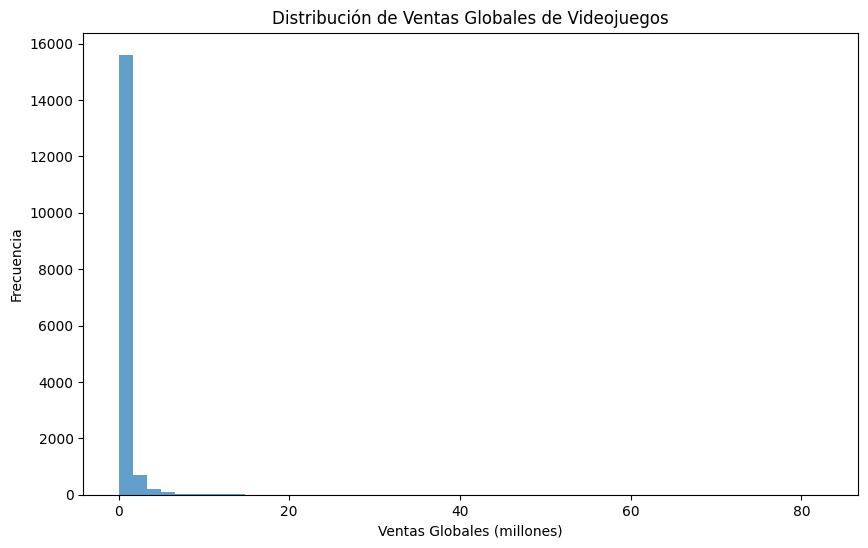

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df['global_sales'], bins=50, alpha=0.7)
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ventas Globales de Videojuegos')
plt.show()

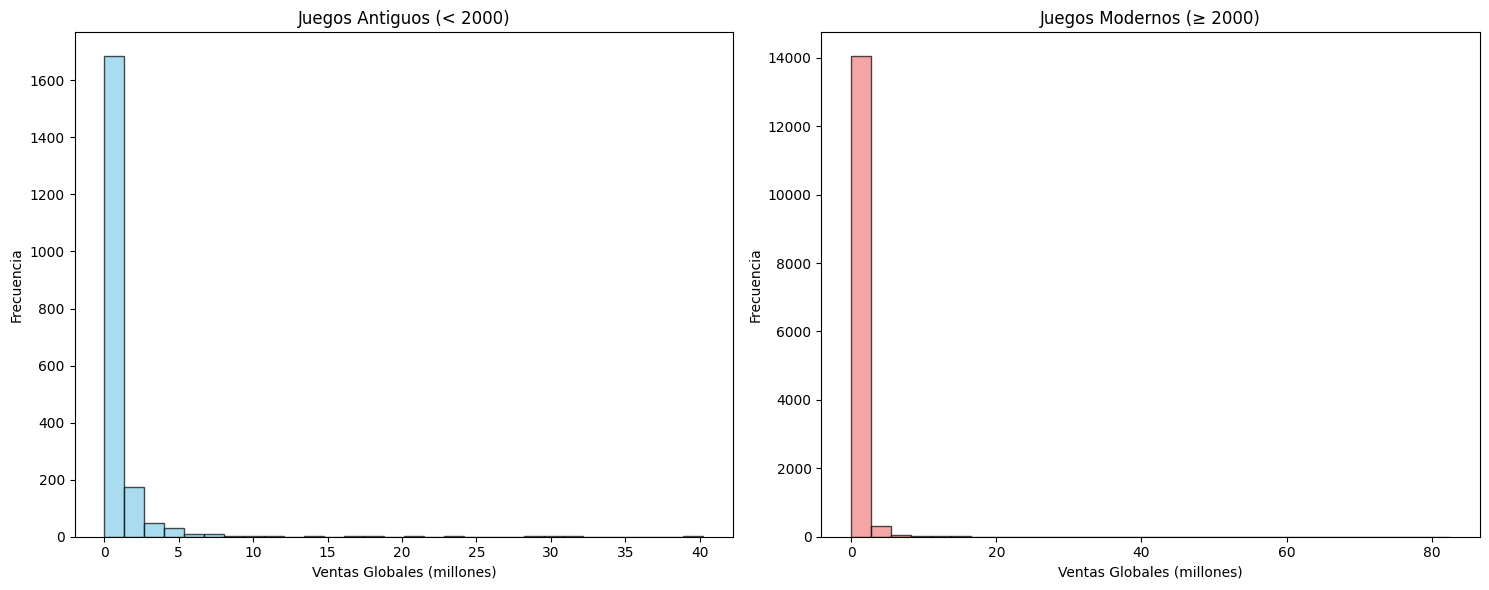

In [37]:
# Crear subplots para comparar distribuciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histograma para juegos antiguos
ax1.hist(juegos_antiguos['global_sales'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Ventas Globales (millones)')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Juegos Antiguos (< 2000)')

# Histograma para juegos modernos
ax2.hist(juegos_modernos['global_sales'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Ventas Globales (millones)')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Juegos Modernos (≥ 2000)')

plt.tight_layout()
plt.show()

Cálculo de desviación estándar y varianza (con interpretación) de Ventas Globales

In [38]:
# Cálculo de desviación estándar y varianza para ventas globales
print("=== ANÁLISIS DE DISPERSIÓN: VENTAS GLOBALES ===")
print()

# Estadísticas básicas para contexto
media_ventas = df['global_sales'].mean()
mediana_ventas = df['global_sales'].median()

print(f"Media de ventas globales: {media_ventas:.4f} millones")
print(f"Mediana de ventas globales: {mediana_ventas:.4f} millones")
print()

# Cálculo de varianza y desviación estándar
varianza = df['global_sales'].var()
desviacion_std = df['global_sales'].std()

print(f"Varianza: {varianza:.4f} (millones²)")
print(f"Desviación estándar: {desviacion_std:.4f} millones")
print()

# Información adicional para interpretación
print("=== INFORMACIÓN PARA INTERPRETACIÓN ===")
print(f"Coeficiente de variación: {(desviacion_std/media_ventas)*100:.2f}%")
print(f"Rango aproximado (68% de datos): {media_ventas - desviacion_std:.2f} a {media_ventas + desviacion_std:.2f} millones")

=== ANÁLISIS DE DISPERSIÓN: VENTAS GLOBALES ===

Media de ventas globales: 0.5334 millones
Mediana de ventas globales: 0.1700 millones

Varianza: 2.3971 (millones²)
Desviación estándar: 1.5483 millones

=== INFORMACIÓN PARA INTERPRETACIÓN ===
Coeficiente de variación: 290.27%
Rango aproximado (68% de datos): -1.01 a 2.08 millones


INTERPRETACIÓN DE LOS RESULTADOS
1. Alta Dispersión:
La desviación estándar (1.55 millones) es casi 3 veces mayor que la media (0.53 millones)
El coeficiente de variación del 290% confirma una variabilidad extremadamente alta

2. Distribución Asimétrica:
Media (0.53) > Mediana (0.17) indica una distribución con cola larga hacia la derecha
Esto significa que hay pocos juegos con ventas muy altas que "jalan" la media hacia arriba

3. Presencia de Outliers:
El rango teórico incluye valores negativos (-1.01), lo cual es imposible en ventas
Esto confirma que hay valores extremos que distorsionan la distribución normal

# Boxplots para visualizar la comparación de juegos antiguos vs juegos modernos

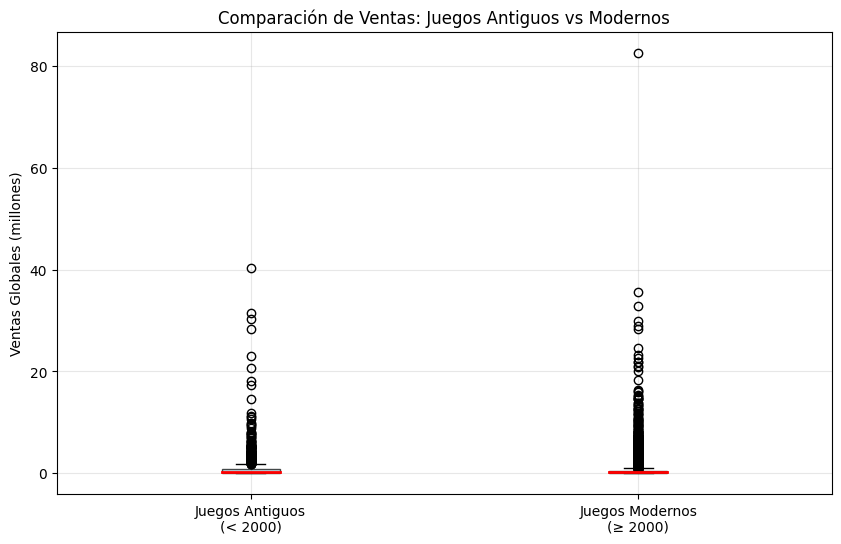

In [39]:
# Crear boxplots para comparar juegos antiguos vs modernos
plt.figure(figsize=(10, 6))

# Preparar los datos para el boxplot
datos_boxplot = [juegos_antiguos['global_sales'], juegos_modernos['global_sales']]
etiquetas = ['Juegos Antiguos\n(< 2000)', 'Juegos Modernos\n(≥ 2000)']

# Crear el boxplot
plt.boxplot(datos_boxplot, labels=etiquetas, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))

plt.ylabel('Ventas Globales (millones)')
plt.title('Comparación de Ventas: Juegos Antiguos vs Modernos')
plt.grid(True, alpha=0.3)
plt.show()

¿Qué diferencias observas entre las dos cajas? Fíjate especialmente en:

Las medianas (línea roja)
El tamaño de las cajas (rango intercuartílico)
Los outliers (puntos fuera de los bigotes)
¿Qué te dice esta comparación sobre el comportamiento de las ventas en cada era?

Cálculo de desviación estándar y varianza (con interpretación) de la comparación de juegos antiguos vs juegos modernos

In [40]:
# Estadísticas básicas para juegos antiguos y modernos
print("=== ESTADÍSTICAS BÁSICAS: JUEGOS ANTIGUOS VS MODERNOS ===")
print()

# JUEGOS ANTIGUOS (< 2000)
print("--- JUEGOS ANTIGUOS (< 2000) ---")
print(f"Cantidad de juegos: {len(juegos_antiguos):,}")
print()
print("Estadísticas de ventas globales:")
print(f"  Media: {juegos_antiguos['global_sales'].mean():.4f} millones")
print(f"  Mediana: {juegos_antiguos['global_sales'].median():.4f} millones")
print(f"  Varianza: {juegos_antiguos['global_sales'].var():.4f} (millones²)")
print(f"  Desviación estándar: {juegos_antiguos['global_sales'].std():.4f} millones")
print()

# JUEGOS MODERNOS (≥ 2000)
print("--- JUEGOS MODERNOS (≥ 2000) ---")
print(f"Cantidad de juegos: {len(juegos_modernos):,}")
print()
print("Estadísticas de ventas globales:")
print(f"  Media: {juegos_modernos['global_sales'].mean():.4f} millones")
print(f"  Mediana: {juegos_modernos['global_sales'].median():.4f} millones")
print(f"  Varianza: {juegos_modernos['global_sales'].var():.4f} (millones²)")
print(f"  Desviación estándar: {juegos_modernos['global_sales'].std():.4f} millones")
print()

# COMPARACIÓN DIRECTA
print("=== COMPARACIÓN DIRECTA ===")
print(f"Diferencia en media: {juegos_antiguos['global_sales'].mean() - juegos_modernos['global_sales'].mean():.4f} millones")
print(f"Diferencia en mediana: {juegos_antiguos['global_sales'].median() - juegos_modernos['global_sales'].median():.4f} millones")
print(f"Diferencia en desviación estándar: {juegos_antiguos['global_sales'].std() - juegos_modernos['global_sales'].std():.4f} millones")

# COEFICIENTES DE VARIACIÓN
cv_antiguos = (juegos_antiguos['global_sales'].std() / juegos_antiguos['global_sales'].mean()) * 100
cv_modernos = (juegos_modernos['global_sales'].std() / juegos_modernos['global_sales'].mean()) * 100

print()
print("=== COEFICIENTES DE VARIACIÓN ===")
print(f"Juegos antiguos: {cv_antiguos:.2f}%")
print(f"Juegos modernos: {cv_modernos:.2f}%")

=== ESTADÍSTICAS BÁSICAS: JUEGOS ANTIGUOS VS MODERNOS ===

--- JUEGOS ANTIGUOS (< 2000) ---
Cantidad de juegos: 1,976

Estadísticas de ventas globales:
  Media: 0.8389 millones
  Mediana: 0.3000 millones
  Varianza: 4.4343 (millones²)
  Desviación estándar: 2.1058 millones

--- JUEGOS MODERNOS (≥ 2000) ---
Cantidad de juegos: 14,470

Estadísticas de ventas globales:
  Media: 0.4948 millones
  Mediana: 0.1500 millones
  Varianza: 2.1421 (millones²)
  Desviación estándar: 1.4636 millones

=== COMPARACIÓN DIRECTA ===
Diferencia en media: 0.3441 millones
Diferencia en mediana: 0.1500 millones
Diferencia en desviación estándar: 0.6422 millones

=== COEFICIENTES DE VARIACIÓN ===
Juegos antiguos: 251.02%
Juegos modernos: 295.82%


¿Qué te van a mostrar estas estadísticas?

Media y mediana: Te permitirán comparar las ventas típicas entre ambos grupos
Varianza y desviación estándar: Te mostrarán qué grupo tiene mayor dispersión en las ventas
Coeficiente de variación: Te ayudará a entender qué grupo es más "predecible" en términos de ventas

In [41]:
# ANÁLISIS PROFUNDO DE DISPERSIÓN: VENTAS GLOBALES POR ERA
print("=== ANÁLISIS DETALLADO DE DISPERSIÓN POR ERA ===")
print()

# Datos que ya tienemos calculados
media_antiguos = juegos_antiguos['global_sales'].mean()
media_modernos = juegos_modernos['global_sales'].mean()
var_antiguos = juegos_antiguos['global_sales'].var()
var_modernos = juegos_modernos['global_sales'].var()
std_antiguos = juegos_antiguos['global_sales'].std()
std_modernos = juegos_modernos['global_sales'].std()

print("=== MEDIDAS DE DISPERSIÓN DETALLADAS ===")
print()
print("--- JUEGOS ANTIGUOS (< 2000) ---")
print(f"Varianza: {var_antiguos:.4f} (millones²)")
print(f"Desviación estándar: {std_antiguos:.4f} millones")
print(f"Coeficiente de variación: {(std_antiguos/media_antiguos)*100:.2f}%")
print()
print("--- JUEGOS MODERNOS (≥ 2000) ---")
print(f"Varianza: {var_modernos:.4f} (millones²)")
print(f"Desviación estándar: {std_modernos:.4f} millones")
print(f"Coeficiente de variación: {(std_modernos/media_modernos)*100:.2f}%")

print()
print("=== COMPARACIÓN DE VARIABILIDAD ===")
print(f"Diferencia en varianza: {var_antiguos - var_modernos:.4f} (millones²)")
print(f"Diferencia en desviación estándar: {std_antiguos - std_modernos:.4f} millones")
print(f"Ratio de varianzas (Antiguos/Modernos): {var_antiguos/var_modernos:.2f}")

# Interpretación de la variabilidad
print()
print("=== INTERPRETACIÓN DE LA VARIABILIDAD ===")
if std_antiguos > std_modernos:
    print("→ Los juegos antiguos muestran MAYOR dispersión en ventas")
    print(f"  • Esto significa que hay más diferencias extremas entre juegos exitosos y no exitosos")
else:
    print("→ Los juegos modernos muestran MAYOR dispersión en ventas")

# Análisis del coeficiente de variación
cv_antiguos = (std_antiguos/media_antiguos)*100
cv_modernos = (std_modernos/media_modernos)*100

print()
print("=== ANÁLISIS DE PREDICTIBILIDAD ===")
if cv_antiguos < cv_modernos:
    print("→ Los juegos antiguos son más PREDECIBLES en términos relativos")
    print(f"  • CV Antiguos: {cv_antiguos:.1f}% vs CV Modernos: {cv_modernos:.1f}%")
else:
    print("→ Los juegos modernos son más PREDECIBLES en términos relativos")
    print(f"  • CV Modernos: {cv_modernos:.1f}% vs CV Antiguos: {cv_antiguos:.1f}%")

# Rangos de dispersión
print()
print("=== RANGOS DE DISPERSIÓN (±1 DESVIACIÓN ESTÁNDAR) ===")
print("--- JUEGOS ANTIGUOS ---")
print(f"Rango típico: {media_antiguos - std_antiguos:.2f} a {media_antiguos + std_antiguos:.2f} millones")
print("--- JUEGOS MODERNOS ---")
print(f"Rango típico: {media_modernos - std_modernos:.2f} a {media_modernos + std_modernos:.2f} millones")

print("\n=== INTERPRETACIÓN DE RESULTADOS ===")
print("¿Qué nos dicen estas estadísticas sobre cada era?")

=== ANÁLISIS DETALLADO DE DISPERSIÓN POR ERA ===

=== MEDIDAS DE DISPERSIÓN DETALLADAS ===

--- JUEGOS ANTIGUOS (< 2000) ---
Varianza: 4.4343 (millones²)
Desviación estándar: 2.1058 millones
Coeficiente de variación: 251.02%

--- JUEGOS MODERNOS (≥ 2000) ---
Varianza: 2.1421 (millones²)
Desviación estándar: 1.4636 millones
Coeficiente de variación: 295.82%

=== COMPARACIÓN DE VARIABILIDAD ===
Diferencia en varianza: 2.2922 (millones²)
Diferencia en desviación estándar: 0.6422 millones
Ratio de varianzas (Antiguos/Modernos): 2.07

=== INTERPRETACIÓN DE LA VARIABILIDAD ===
→ Los juegos antiguos muestran MAYOR dispersión en ventas
  • Esto significa que hay más diferencias extremas entre juegos exitosos y no exitosos

=== ANÁLISIS DE PREDICTIBILIDAD ===
→ Los juegos antiguos son más PREDECIBLES en términos relativos
  • CV Antiguos: 251.0% vs CV Modernos: 295.8%

=== RANGOS DE DISPERSIÓN (±1 DESVIACIÓN ESTÁNDAR) ===
--- JUEGOS ANTIGUOS ---
Rango típico: -1.27 a 2.94 millones
--- JUEGOS MO

<div class="alert alert-block alert-warning">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Este analisis que haces para juegos antiguos y modernos es interesante y podría ser de utilidad para entender el comportamiento de los usuarios a lo largo del tiempo. Sin embargo, como esta parte es un proceso que añadiste extra a los pasos solicitados en la tarea, te recomiendo darle mayor orden y direccion al analisis aqui, ya que parecen ser datos aislados a lo que estamos buscando realmente. 

# Análisis de la evolución temporal y gráfico de líneas mostrando las ventas por año.

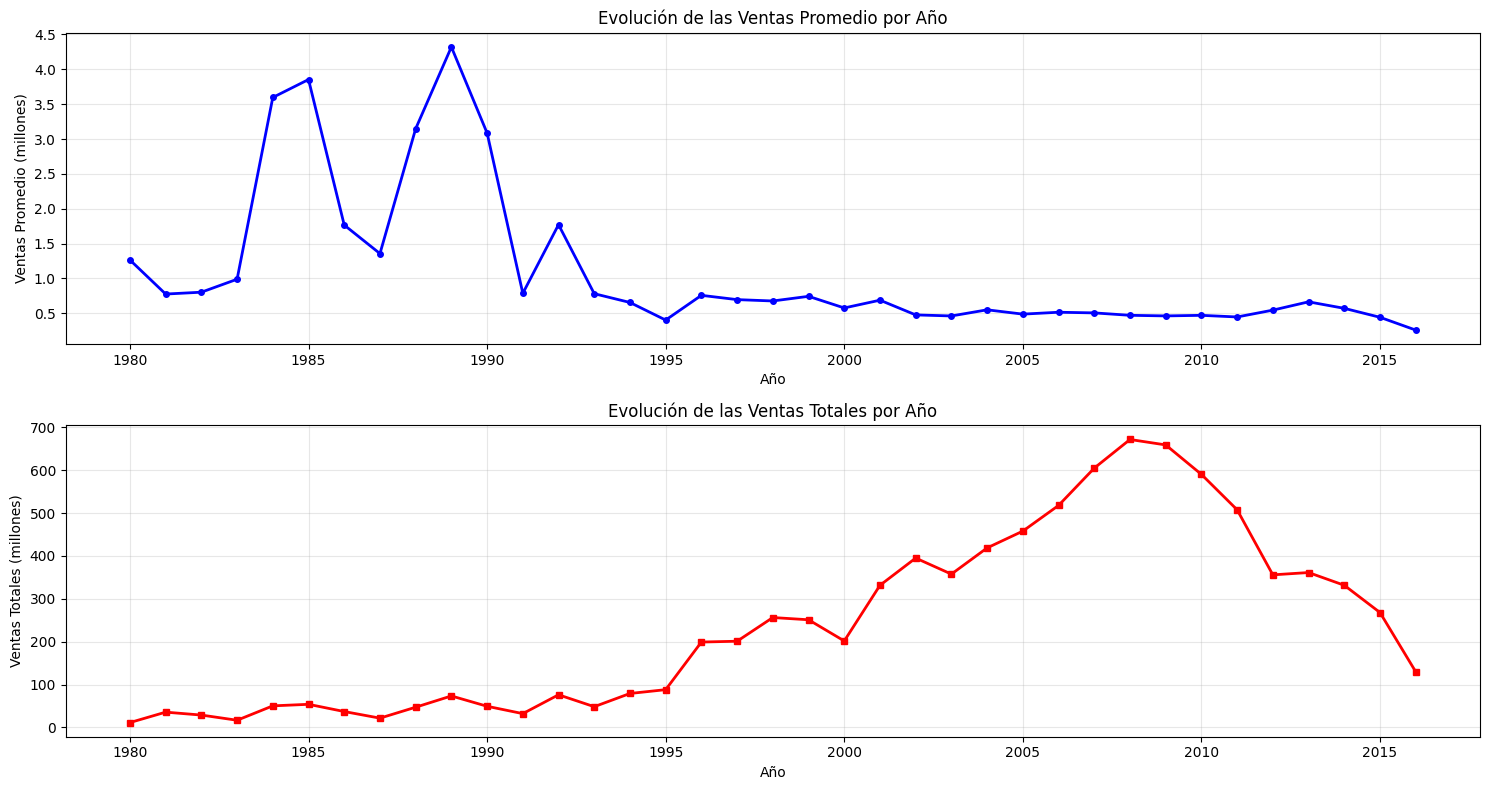

In [38]:
# Análisis de evolución temporal - ventas por año
# Primero, eliminamos los valores nulos de year_of_release para el análisis
df_temporal = df.dropna(subset=['year_of_release'])

# Calculamos las ventas promedio por año
ventas_por_año = df_temporal.groupby('year_of_release')['global_sales'].agg(['mean', 'sum', 'count']).reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(15, 8))

# Gráfico de ventas promedio por año
plt.subplot(2, 1, 1)
plt.plot(ventas_por_año['year_of_release'], ventas_por_año['mean'], 
         marker='o', linewidth=2, markersize=4, color='blue')
plt.xlabel('Año')
plt.ylabel('Ventas Promedio (millones)')
plt.title('Evolución de las Ventas Promedio por Año')
plt.grid(True, alpha=0.3)

# Gráfico de ventas totales por año
plt.subplot(2, 1, 2)
plt.plot(ventas_por_año['year_of_release'], ventas_por_año['sum'], 
         marker='s', linewidth=2, markersize=4, color='red')
plt.xlabel('Año')
plt.ylabel('Ventas Totales (millones)')
plt.title('Evolución de las Ventas Totales por Año')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

¿Qué patrones observas en ambos gráficos? 

Fíjate especialmente en:
- ¿Hay años con picos notables?
- ¿Existe alguna tendencia general (crecimiento, declive)?
- ¿Cómo se relacionan las ventas promedio vs las ventas totales?

# Análisis por plataformas creando un gráfico de barras de las plataformas más exitosas.

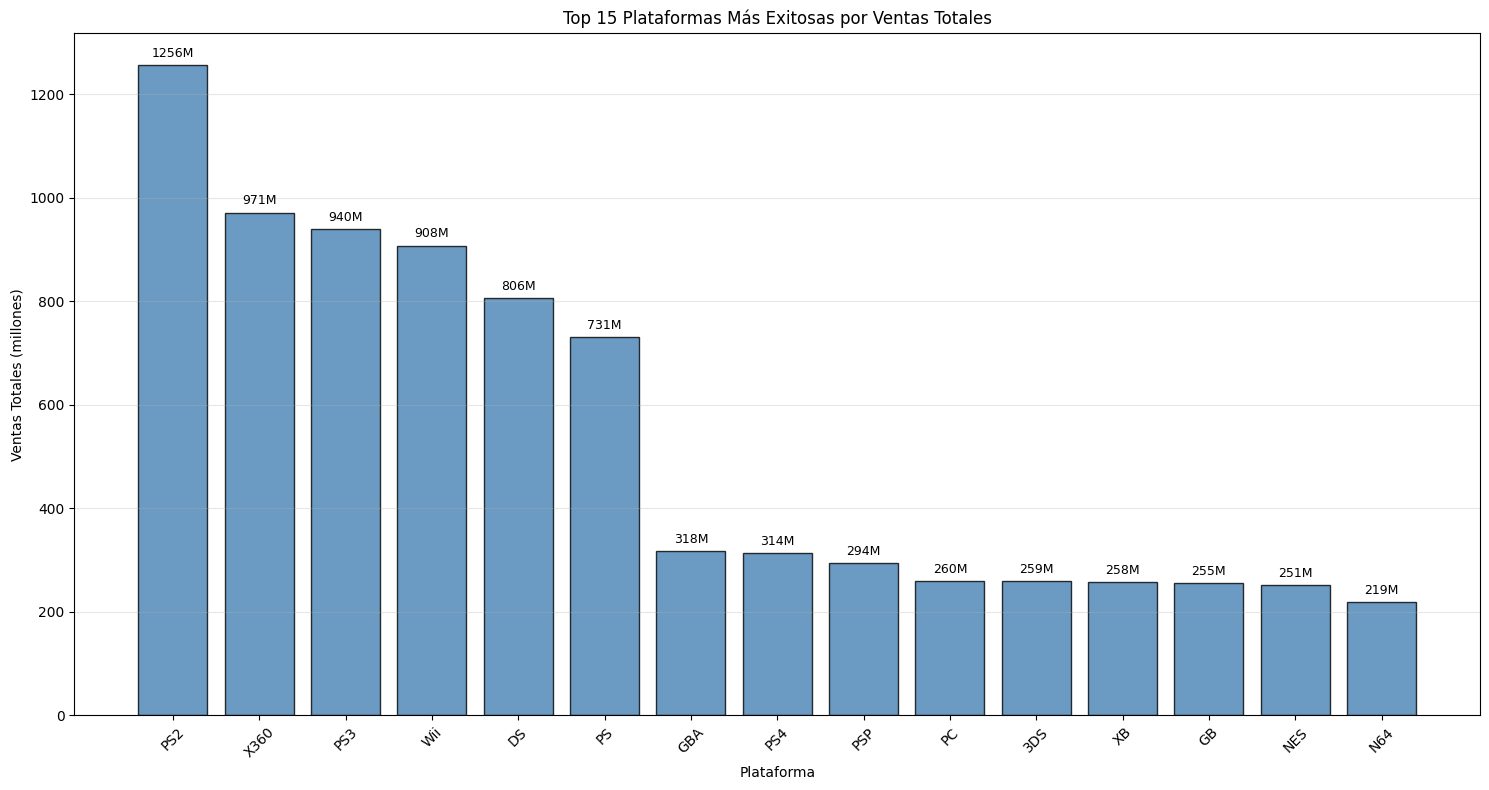

=== TOP 15 PLATAFORMAS MÁS EXITOSAS ===
   platform  ventas_totales  cantidad_juegos  ventas_promedio
16      PS2         1255.77             2161             0.58
28     X360          971.42             1262             0.77
17      PS3          939.65             1331             0.71
26      Wii          907.51             1320             0.69
4        DS          806.12             2151             0.37
15       PS          730.86             1197             0.61
6       GBA          317.85              822             0.39
18      PS4          314.14              392             0.80
19      PSP          294.05             1209             0.24
13       PC          259.52              974             0.27
2       3DS          259.00              520             0.50
29       XB          257.74              824             0.31
5        GB          255.46               98             2.61
11      NES          251.05               98             2.56
10      N64          218.68   

In [39]:
# Análisis de plataformas más exitosas
# Calculamos ventas totales por plataforma
ventas_por_plataforma = df.groupby('platform')['global_sales'].agg(['sum', 'count', 'mean']).reset_index()
ventas_por_plataforma.columns = ['platform', 'ventas_totales', 'cantidad_juegos', 'ventas_promedio']

# Ordenamos por ventas totales y tomamos las top 15
top_plataformas = ventas_por_plataforma.sort_values('ventas_totales', ascending=False).head(15)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
bars = plt.bar(top_plataformas['platform'], top_plataformas['ventas_totales'], 
               color='steelblue', alpha=0.8, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.title('Top 15 Plataformas Más Exitosas por Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:.0f}M', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Mostrar los datos en tabla
print("=== TOP 15 PLATAFORMAS MÁS EXITOSAS ===")
print(top_plataformas[['platform', 'ventas_totales', 'cantidad_juegos', 'ventas_promedio']].round(2))

¿Qué plataformas dominan el ranking? 

También piensa en:
- ¿Hay alguna sorpresa en los resultados?
- ¿Cómo se relaciona la cantidad de juegos con las ventas totales?
- ¿Qué generaciones de consolas están mejor representadas?

<div class="alert alert-block alert-warning">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Ya que comenzaste aquí el analisis propuesto, te recomiendo elegir un rango temporal definido, como habia comentado anteriormente, ya que tomar todos los años del dataset no nos será de utilidad para entender el comportamiento de los usuarios para el 2017.

También acá veo que añades las preguntas que debes plantearte de cara a los resultados pero aun no las has respondido, te invito a hacerlo para completar bien el analisis.

# Análisis por géneros y visualización de géneros más populares.

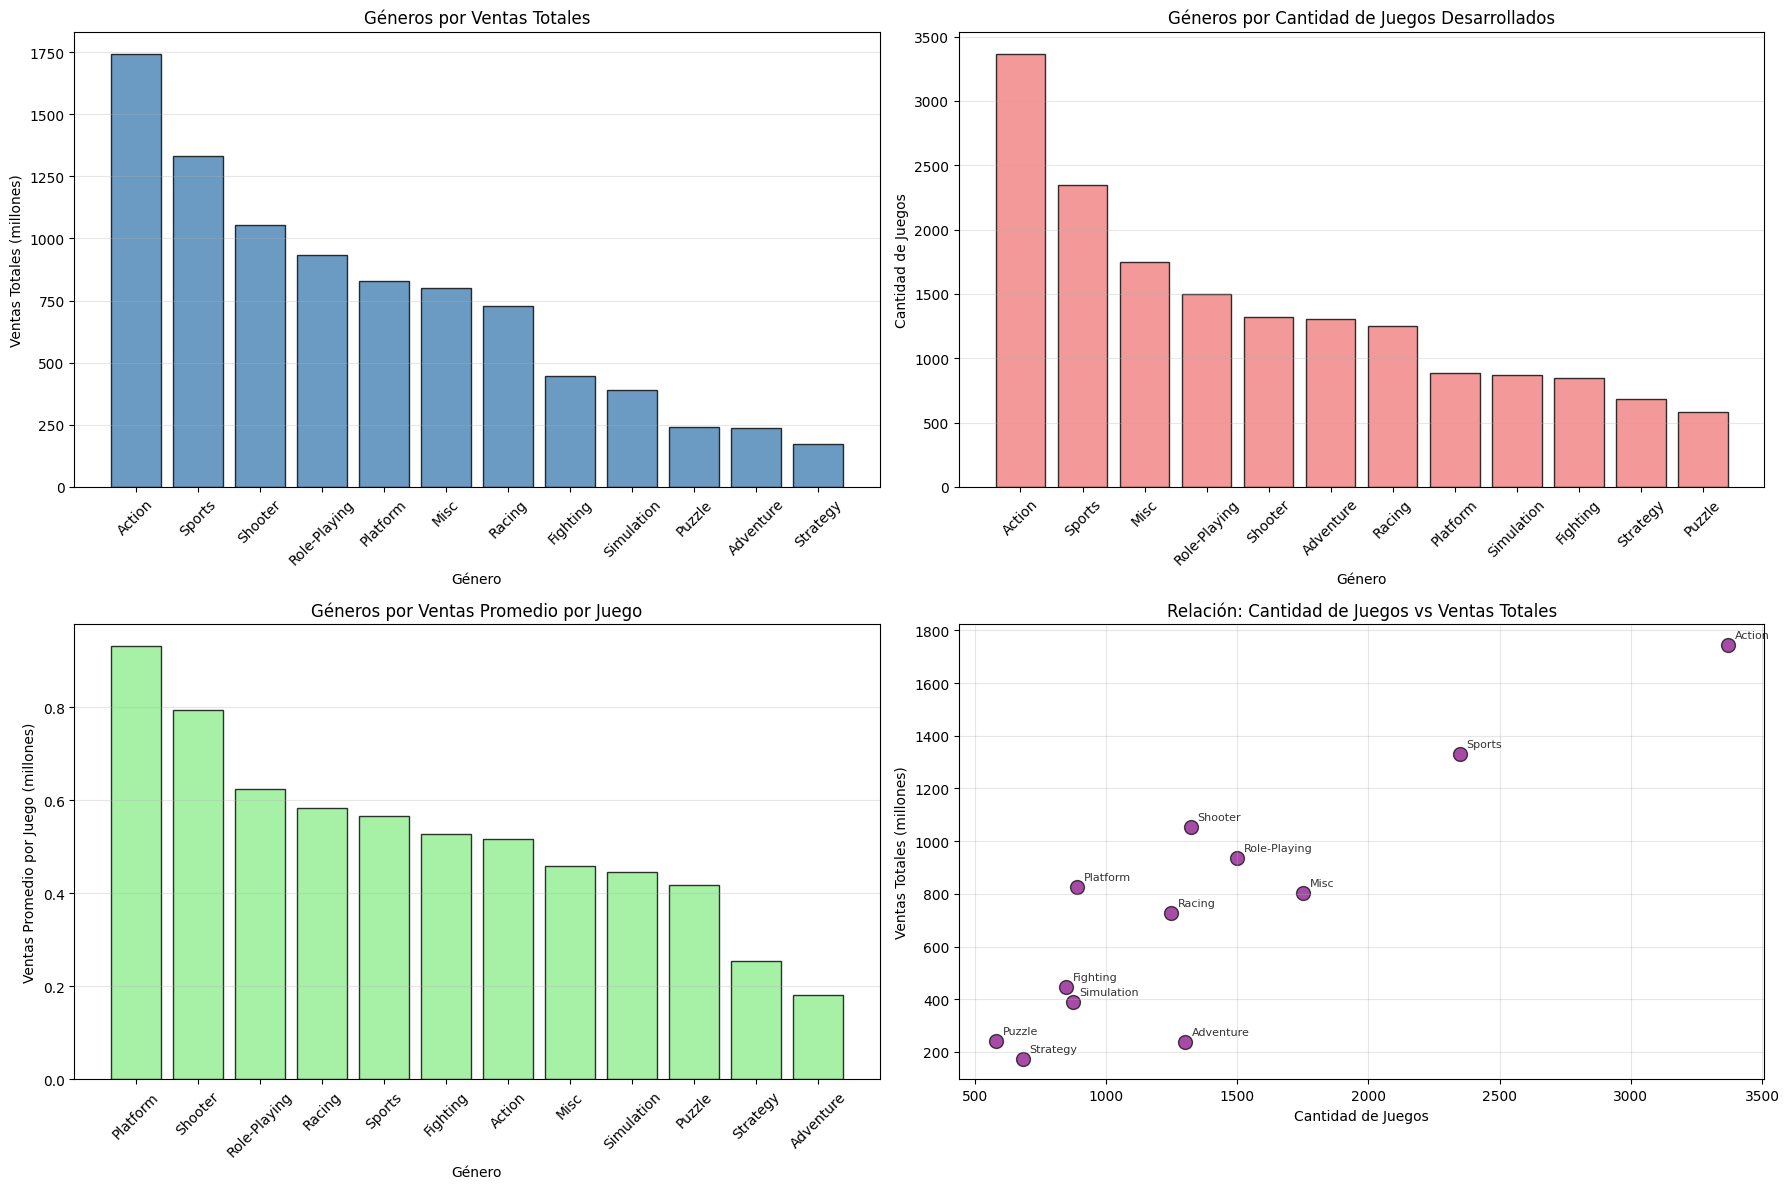

=== ANÁLISIS COMPLETO DE GÉNEROS ===

Top 5 géneros por ventas totales:
           genre  ventas_totales  cantidad_juegos  ventas_promedio
0         Action         1744.17             3369         0.517711
10        Sports         1331.27             2348         0.566980
8        Shooter         1052.45             1323         0.795503
7   Role-Playing          934.56             1498         0.623872
4       Platform          827.77              888         0.932173

Top 5 géneros por cantidad de juegos:
           genre  cantidad_juegos  ventas_totales  ventas_promedio
0         Action             3369         1744.17         0.517711
10        Sports             2348         1331.27         0.566980
3           Misc             1750          802.51         0.458577
7   Role-Playing             1498          934.56         0.623872
8        Shooter             1323         1052.45         0.795503

Top 5 géneros por ventas promedio:
           genre  ventas_promedio  cantidad_juego

In [40]:
# Análisis completo de géneros más populares
# Calculamos métricas por género
generos_analisis = df.groupby('genre')['global_sales'].agg(['count', 'sum', 'mean']).reset_index()
generos_analisis.columns = ['genre', 'cantidad_juegos', 'ventas_totales', 'ventas_promedio']

# Ordenamos por ventas totales para el gráfico principal
top_generos = generos_analisis.sort_values('ventas_totales', ascending=False)

# Crear visualización con subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# 1. Gráfico de barras - Ventas totales por género
bars1 = ax1.bar(top_generos['genre'], top_generos['ventas_totales'], 
                color='steelblue', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Género')
ax1.set_ylabel('Ventas Totales (millones)')
ax1.set_title('Géneros por Ventas Totales')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# 2. Gráfico de barras - Cantidad de juegos por género
top_generos_cantidad = generos_analisis.sort_values('cantidad_juegos', ascending=False)
bars2 = ax2.bar(top_generos_cantidad['genre'], top_generos_cantidad['cantidad_juegos'], 
                color='lightcoral', alpha=0.8, edgecolor='black')
ax2.set_xlabel('Género')
ax2.set_ylabel('Cantidad de Juegos')
ax2.set_title('Géneros por Cantidad de Juegos Desarrollados')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Gráfico de barras - Ventas promedio por género
top_generos_promedio = generos_analisis.sort_values('ventas_promedio', ascending=False)
bars3 = ax3.bar(top_generos_promedio['genre'], top_generos_promedio['ventas_promedio'], 
                color='lightgreen', alpha=0.8, edgecolor='black')
ax3.set_xlabel('Género')
ax3.set_ylabel('Ventas Promedio por Juego (millones)')
ax3.set_title('Géneros por Ventas Promedio por Juego')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Gráfico de dispersión - Relación cantidad vs ventas totales
scatter = ax4.scatter(top_generos['cantidad_juegos'], top_generos['ventas_totales'], 
                     alpha=0.7, s=100, c='purple', edgecolors='black')
ax4.set_xlabel('Cantidad de Juegos')
ax4.set_ylabel('Ventas Totales (millones)')
ax4.set_title('Relación: Cantidad de Juegos vs Ventas Totales')
ax4.grid(True, alpha=0.3)

# Añadir etiquetas a los puntos del scatter plot
for i, genre in enumerate(top_generos['genre']):
    ax4.annotate(genre, 
                (top_generos.iloc[i]['cantidad_juegos'], top_generos.iloc[i]['ventas_totales']),
                xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("=== ANÁLISIS COMPLETO DE GÉNEROS ===")
print("\nTop 5 géneros por ventas totales:")
print(top_generos[['genre', 'ventas_totales', 'cantidad_juegos', 'ventas_promedio']].head())

print("\nTop 5 géneros por cantidad de juegos:")
print(top_generos_cantidad[['genre', 'cantidad_juegos', 'ventas_totales', 'ventas_promedio']].head())

print("\nTop 5 géneros por ventas promedio:")
print(top_generos_promedio[['genre', 'ventas_promedio', 'cantidad_juegos', 'ventas_totales']].head())

# Estadísticas adicionales
print(f"\nTotal de géneros únicos: {len(generos_analisis)}")
print(f"Género más productivo: {top_generos_cantidad.iloc[0]['genre']} ({top_generos_cantidad.iloc[0]['cantidad_juegos']} juegos)")
print(f"Género más exitoso en ventas: {top_generos.iloc[0]['genre']} ({top_generos.iloc[0]['ventas_totales']:.1f} millones)")
print(f"Género con mayor promedio por juego: {top_generos_promedio.iloc[0]['genre']} ({top_generos_promedio.iloc[0]['ventas_promedio']:.2f} millones por juego)")





<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Los datos que presentas para el analisis por generos son muy completos y valiosos. Me gusta que puedas proporcionar no solo los valores totales sino los promedios y las relaciones entre ventas y lanzamientos. 

# Aanálisis y cálculo de correlación entre ventas y reseñas para visualizar como las reseñas afectan las ventas de PS3

In [41]:
# Filtrar datos para PS3
ps3_games = df[df['platform'] == 'PS3'].copy()

# Verificar cuántos juegos tenemos y cuántos tienen reseñas
print("=== ANÁLISIS DE DATOS PS3 ===")
print(f"Total de juegos PS3: {len(ps3_games)}")
print(f"Juegos con critic_score: {ps3_games['critic_score'].notna().sum()}")
print(f"Juegos con user_score: {ps3_games['user_score'].notna().sum()}")
print(f"Juegos con ambas reseñas: {ps3_games[['critic_score', 'user_score']].notna().all(axis=1).sum()}")

# Crear subset con datos completos para el análisis
ps3_completo = ps3_games.dropna(subset=['critic_score', 'user_score', 'global_sales'])
print(f"Juegos PS3 con datos completos para análisis: {len(ps3_completo)}")


=== ANÁLISIS DE DATOS PS3 ===
Total de juegos PS3: 1331
Juegos con critic_score: 820
Juegos con user_score: 877
Juegos con ambas reseñas: 790
Juegos PS3 con datos completos para análisis: 790


=== CORRELACIONES PS3 ===
Correlación Critic Score vs Ventas: 0.428
Correlación User Score vs Ventas: 0.143
Correlación Critic Score vs User Score: 0.629


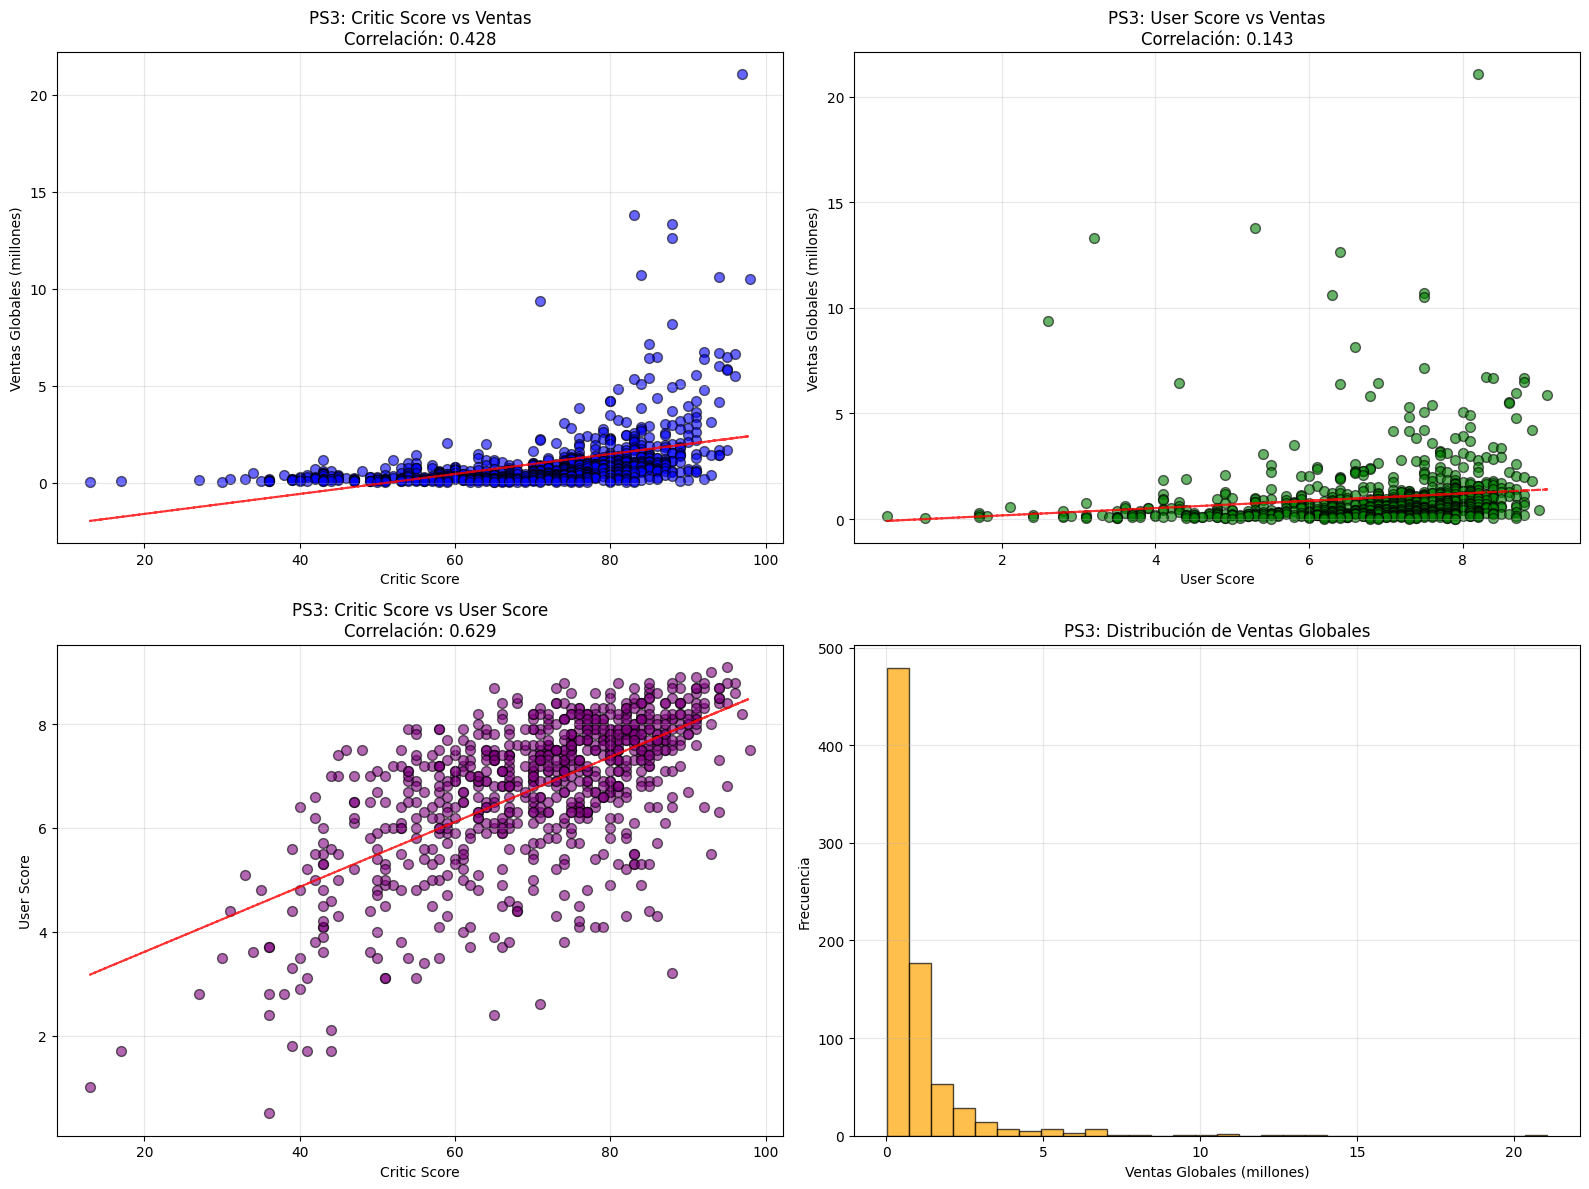


=== ESTADÍSTICAS DESCRIPTIVAS PS3 ===
Ventas Globales:
  Media: 1.00 millones
  Mediana: 0.52 millones
  Desviación estándar: 1.68 millones

Critic Score:
  Media: 70.8
  Mediana: 73.0
  Rango: 13 - 98

User Score:
  Media: 6.8
  Mediana: 7.1
  Rango: 0.5 - 9.1

=== TOP 10 JUEGOS PS3 POR VENTAS ===
                               name  global_sales  critic_score  user_score  \
16               Grand Theft Auto V         21.05          97.0         8.2   
34       Call of Duty: Black Ops II         13.79          83.0         5.3   
37   Call of Duty: Modern Warfare 3         13.33          88.0         3.2   
41          Call of Duty: Black Ops         12.63          88.0         6.4   
54                   Gran Turismo 5         10.70          84.0         7.5   
55   Call of Duty: Modern Warfare 2         10.61          94.0         6.3   
57              Grand Theft Auto IV         10.50          98.0         7.5   
69             Call of Duty: Ghosts          9.36          71.0    

In [42]:
# Análisis de correlación entre reseñas y ventas para PS3
import scipy.stats as stats

# Calcular correlaciones
corr_critic_ventas = ps3_completo['critic_score'].corr(ps3_completo['global_sales'])
corr_user_ventas = ps3_completo['user_score'].corr(ps3_completo['global_sales'])
corr_critic_user = ps3_completo['critic_score'].corr(ps3_completo['user_score'])

print("=== CORRELACIONES PS3 ===")
print(f"Correlación Critic Score vs Ventas: {corr_critic_ventas:.3f}")
print(f"Correlación User Score vs Ventas: {corr_user_ventas:.3f}")
print(f"Correlación Critic Score vs User Score: {corr_critic_user:.3f}")

# Crear gráficos de dispersión
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Critic Score vs Ventas Globales
ax1.scatter(ps3_completo['critic_score'], ps3_completo['global_sales'], 
           alpha=0.6, color='blue', edgecolors='black', s=50)
ax1.set_xlabel('Critic Score')
ax1.set_ylabel('Ventas Globales (millones)')
ax1.set_title(f'PS3: Critic Score vs Ventas\nCorrelación: {corr_critic_ventas:.3f}')
ax1.grid(True, alpha=0.3)

# Línea de tendencia
z1 = np.polyfit(ps3_completo['critic_score'], ps3_completo['global_sales'], 1)
p1 = np.poly1d(z1)
ax1.plot(ps3_completo['critic_score'], p1(ps3_completo['critic_score']), "r--", alpha=0.8)

# 2. User Score vs Ventas Globales
ax2.scatter(ps3_completo['user_score'], ps3_completo['global_sales'], 
           alpha=0.6, color='green', edgecolors='black', s=50)
ax2.set_xlabel('User Score')
ax2.set_ylabel('Ventas Globales (millones)')
ax2.set_title(f'PS3: User Score vs Ventas\nCorrelación: {corr_user_ventas:.3f}')
ax2.grid(True, alpha=0.3)

# Línea de tendencia
z2 = np.polyfit(ps3_completo['user_score'], ps3_completo['global_sales'], 1)
p2 = np.poly1d(z2)
ax2.plot(ps3_completo['user_score'], p2(ps3_completo['user_score']), "r--", alpha=0.8)

# 3. Critic Score vs User Score
ax3.scatter(ps3_completo['critic_score'], ps3_completo['user_score'],
           alpha=0.6, color='purple', edgecolors='black', s=50)
ax3.set_xlabel('Critic Score')
ax3.set_ylabel('User Score')
ax3.set_title(f'PS3: Critic Score vs User Score\nCorrelación: {corr_critic_user:.3f}')
ax3.grid(True, alpha=0.3)

# Línea de tendencia
z3 = np.polyfit(ps3_completo['critic_score'], ps3_completo['user_score'], 1)
p3 = np.poly1d(z3)
ax3.plot(ps3_completo['critic_score'], p3(ps3_completo['critic_score']), "r--", alpha=0.8)

# 4. Histograma de ventas PS3
ax4.hist(ps3_completo['global_sales'], bins=30, alpha=0.7, color='orange', edgecolor='black')
ax4.set_xlabel('Ventas Globales (millones)')
ax4.set_ylabel('Frecuencia')
ax4.set_title('PS3: Distribución de Ventas Globales')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas adicionales para PS3
print("\n=== ESTADÍSTICAS DESCRIPTIVAS PS3 ===")
print("Ventas Globales:")
print(f"  Media: {ps3_completo['global_sales'].mean():.2f} millones")
print(f"  Mediana: {ps3_completo['global_sales'].median():.2f} millones")
print(f"  Desviación estándar: {ps3_completo['global_sales'].std():.2f} millones")

print("\nCritic Score:")
print(f"  Media: {ps3_completo['critic_score'].mean():.1f}")
print(f"  Mediana: {ps3_completo['critic_score'].median():.1f}")
print(f"  Rango: {ps3_completo['critic_score'].min():.0f} - {ps3_completo['critic_score'].max():.0f}")

print("\nUser Score:")
print(f"  Media: {ps3_completo['user_score'].mean():.1f}")
print(f"  Mediana: {ps3_completo['user_score'].median():.1f}")
print(f"  Rango: {ps3_completo['user_score'].min():.1f} - {ps3_completo['user_score'].max():.1f}")

# Top 10 juegos PS3 por ventas
print("\n=== TOP 10 JUEGOS PS3 POR VENTAS ===")
top_ps3 = ps3_completo.nlargest(10, 'global_sales')[['name', 'global_sales', 'critic_score', 'user_score', 'genre']]
print(top_ps3)


Análisis estadístico profundo de la plataforma PS3

In [43]:
# ANÁLISIS DE DISPERSIÓN: VENTAS GLOBALES PS3
print("=== ANÁLISIS DE DISPERSIÓN: PLATAFORMA PS3 ===")
print()

# Filtrar datos para PS3
ps3_games = df[df['platform'] == 'PS3'].copy()

# Estadísticas básicas
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de juegos PS3: {len(ps3_games):,}")
print(f"Juegos PS3 con datos de ventas: {ps3_games['global_sales'].notna().sum():,}")
print()

# Estadísticas descriptivas
media_ps3 = ps3_games['global_sales'].mean()
mediana_ps3 = ps3_games['global_sales'].median()
print("=== ESTADÍSTICAS BÁSICAS ===")
print(f"Media de ventas PS3: {media_ps3:.4f} millones")
print(f"Mediana de ventas PS3: {mediana_ps3:.4f} millones")
print(f"Ventas mínimas: {ps3_games['global_sales'].min():.4f} millones")
print(f"Ventas máximas: {ps3_games['global_sales'].max():.4f} millones")
print()

# Cálculo de varianza y desviación estándar
varianza_ps3 = ps3_games['global_sales'].var()
desviacion_std_ps3 = ps3_games['global_sales'].std()

print("=== MEDIDAS DE DISPERSIÓN ===")
print(f"Varianza: {varianza_ps3:.4f} (millones²)")
print(f"Desviación estándar: {desviacion_std_ps3:.4f} millones")
print()

# Coeficiente de variación
cv_ps3 = (desviacion_std_ps3 / media_ps3) * 100
print("=== INTERPRETACIÓN ===")
print(f"Coeficiente de variación: {cv_ps3:.2f}%")
print(f"Rango típico (68% de datos): {media_ps3 - desviacion_std_ps3:.2f} a {media_ps3 + desviacion_std_ps3:.2f} millones")

=== ANÁLISIS DE DISPERSIÓN: PLATAFORMA PS3 ===

=== INFORMACIÓN GENERAL ===
Total de juegos PS3: 1,331
Juegos PS3 con datos de ventas: 1,331

=== ESTADÍSTICAS BÁSICAS ===
Media de ventas PS3: 0.7060 millones
Mediana de ventas PS3: 0.2700 millones
Ventas mínimas: 0.0000 millones
Ventas máximas: 21.0500 millones

=== MEDIDAS DE DISPERSIÓN ===
Varianza: 1.9370 (millones²)
Desviación estándar: 1.3917 millones

=== INTERPRETACIÓN ===
Coeficiente de variación: 197.14%
Rango típico (68% de datos): -0.69 a 2.10 millones


In [44]:
# Análisis de dispersión para Critic Score
print("=== ANÁLISIS DE DISPERSIÓN: CRITIC SCORE ===")
print()

# Primero, eliminamos los valores nulos para el análisis
critic_scores_validos = df['critic_score'].dropna()

print(f"Total de juegos con critic_score: {len(critic_scores_validos):,}")
print(f"Juegos sin critic_score: {df['critic_score'].isna().sum():,}")
print()

# Estadísticas básicas
media_critic = critic_scores_validos.mean()
mediana_critic = critic_scores_validos.median()

print("=== ESTADÍSTICAS BÁSICAS ===")
print(f"Media de critic_score: {media_critic:.2f}")
print(f"Mediana de critic_score: {mediana_critic:.2f}")
print(f"Valor mínimo: {critic_scores_validos.min():.0f}")
print(f"Valor máximo: {critic_scores_validos.max():.0f}")
print()

# Cálculo de varianza y desviación estándar
varianza_critic = critic_scores_validos.var()
desviacion_std_critic = critic_scores_validos.std()

print("=== MEDIDAS DE DISPERSIÓN ===")
print(f"Varianza: {varianza_critic:.4f}")
print(f"Desviación estándar: {desviacion_std_critic:.4f}")
print()

# Coeficiente de variación
cv_critic = (desviacion_std_critic / media_critic) * 100

print("=== INTERPRETACIÓN ===")
print(f"Coeficiente de variación: {cv_critic:.2f}%")
print(f"Rango aproximado (68% de datos): {media_critic - desviacion_std_critic:.1f} a {media_critic + desviacion_std_critic:.1f}")

# Percentiles para mejor comprensión
print()
print("=== DISTRIBUCIÓN POR PERCENTILES ===")
print(f"25%: {critic_scores_validos.quantile(0.25):.1f}")
print(f"50% (mediana): {critic_scores_validos.quantile(0.50):.1f}")
print(f"75%: {critic_scores_validos.quantile(0.75):.1f}")
print(f"90%: {critic_scores_validos.quantile(0.90):.1f}")

=== ANÁLISIS DE DISPERSIÓN: CRITIC SCORE ===

Total de juegos con critic_score: 8,137
Juegos sin critic_score: 8,578

=== ESTADÍSTICAS BÁSICAS ===
Media de critic_score: 68.97
Mediana de critic_score: 71.00
Valor mínimo: 13
Valor máximo: 98

=== MEDIDAS DE DISPERSIÓN ===
Varianza: 194.2724
Desviación estándar: 13.9382

=== INTERPRETACIÓN ===
Coeficiente de variación: 20.21%
Rango aproximado (68% de datos): 55.0 a 82.9

=== DISTRIBUCIÓN POR PERCENTILES ===
25%: 60.0
50% (mediana): 71.0
75%: 79.0
90%: 85.0


¿Qué te van a mostrar estos resultados?

Varianza: Te indicará qué tan dispersas están las puntuaciones de los críticos
Desviación estándar: Te dará una medida más interpretable de la dispersión
Coeficiente de variación: Te permitirá comparar la variabilidad relativa con otras métricas

Análisis de desviación estándar y varianza de critic_score

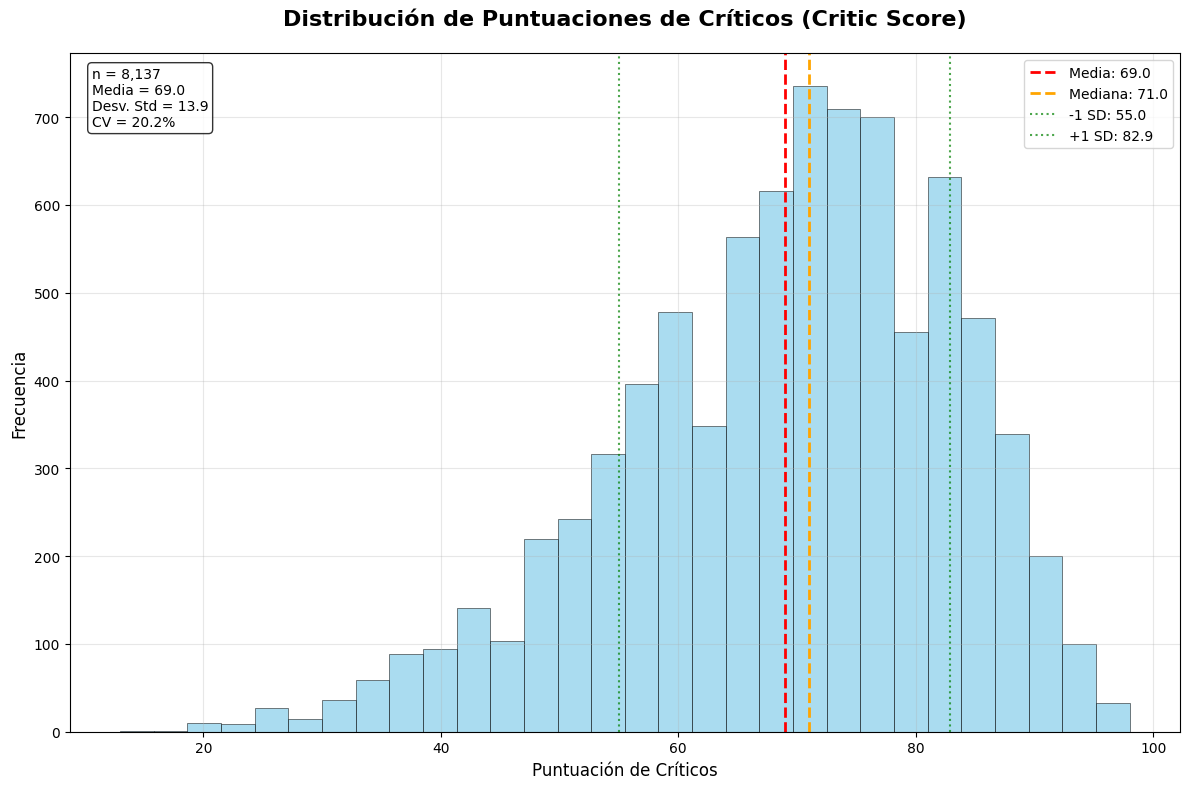

=== ANÁLISIS DE LA DISTRIBUCIÓN ===

Asimetría (skewness): -0.614
  → Distribución con cola hacia la izquierda

Curtosis (kurtosis): 0.142
  → Distribución más puntiaguda que la normal


In [45]:
# Histograma para la distribución de Critic Score
# Configuración del gráfico
plt.figure(figsize=(12, 8))

# Crear el histograma
plt.hist(critic_scores_validos, bins=30, alpha=0.7, color='skyblue', 
         edgecolor='black', linewidth=0.5)

# Líneas para media y mediana
plt.axvline(media_critic, color='red', linestyle='--', linewidth=2, 
           label=f'Media: {media_critic:.1f}')
plt.axvline(mediana_critic, color='orange', linestyle='--', linewidth=2, 
           label=f'Mediana: {mediana_critic:.1f}')

# Líneas para desviación estándar
plt.axvline(media_critic - desviacion_std_critic, color='green', linestyle=':', 
           alpha=0.7, label=f'-1 SD: {media_critic - desviacion_std_critic:.1f}')
plt.axvline(media_critic + desviacion_std_critic, color='green', linestyle=':', 
           alpha=0.7, label=f'+1 SD: {media_critic + desviacion_std_critic:.1f}')

# Personalización del gráfico
plt.title('Distribución de Puntuaciones de Críticos (Critic Score)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Puntuación de Críticos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Añadir estadísticas en el gráfico
stats_text = f'n = {len(critic_scores_validos):,}\nMedia = {media_critic:.1f}\nDesv. Std = {desviacion_std_critic:.1f}\nCV = {cv_critic:.1f}%'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Análisis adicional de la distribución
print("=== ANÁLISIS DE LA DISTRIBUCIÓN ===")
print()

# Verificar normalidad visual
from scipy import stats
skewness = stats.skew(critic_scores_validos)
kurtosis = stats.kurtosis(critic_scores_validos)

print(f"Asimetría (skewness): {skewness:.3f}")
if skewness > 0:
    print("  → Distribución con cola hacia la derecha")
elif skewness < 0:
    print("  → Distribución con cola hacia la izquierda")
else:
    print("  → Distribución simétrica")

print()
print(f"Curtosis (kurtosis): {kurtosis:.3f}")
if kurtosis > 0:
    print("  → Distribución más puntiaguda que la normal")
elif kurtosis < 0:
    print("  → Distribución más plana que la normal")
else:
    print("  → Distribución similar a la normal")

¿Qué vas a poder observar en este histograma?

Forma de la distribución: Si es simétrica, sesgada, o tiene múltiples picos
Concentración de datos: Dónde se agrupan la mayoría de las puntuaciones
Valores atípicos: Si hay puntuaciones muy altas o muy bajas
Relación media-mediana: Cómo se comparan visualmente

Análisis de desviación estándar y varianza de user_score

In [46]:
# Análisis de dispersión para User Score
print("=== ANÁLISIS DE DISPERSIÓN: USER SCORE ===")
print()

# Primero, eliminamos los valores nulos para el análisis
user_scores_validos = df['user_score'].dropna()

print(f"Total de juegos con user_score: {len(user_scores_validos):,}")
print(f"Juegos sin user_score: {df['user_score'].isna().sum():,}")
print()

# Estadísticas básicas
media_user = user_scores_validos.mean()
mediana_user = user_scores_validos.median()

print("=== ESTADÍSTICAS BÁSICAS ===")
print(f"Media de user_score: {media_user:.2f}")
print(f"Mediana de user_score: {mediana_user:.2f}")
print(f"Valor mínimo: {user_scores_validos.min():.1f}")
print(f"Valor máximo: {user_scores_validos.max():.1f}")
print()

# Cálculo de varianza y desviación estándar
varianza_user = user_scores_validos.var()
desviacion_std_user = user_scores_validos.std()

print("=== MEDIDAS DE DISPERSIÓN ===")
print(f"Varianza: {varianza_user:.4f}")
print(f"Desviación estándar: {desviacion_std_user:.4f}")
print()

# Coeficiente de variación
cv_user = (desviacion_std_user / media_user) * 100

print("=== INTERPRETACIÓN ===")
print(f"Coeficiente de variación: {cv_user:.2f}%")
print(f"Rango aproximado (68% de datos): {media_user - desviacion_std_user:.1f} a {media_user + desviacion_std_user:.1f}")

# Percentiles para mejor comprensión
print()
print("=== DISTRIBUCIÓN POR PERCENTILES ===")
print(f"25%: {user_scores_validos.quantile(0.25):.1f}")
print(f"50% (mediana): {user_scores_validos.quantile(0.50):.1f}")
print(f"75%: {user_scores_validos.quantile(0.75):.1f}")
print(f"90%: {user_scores_validos.quantile(0.90):.1f}")

# Comparación con Critic Score
print()
print("=== COMPARACIÓN CON CRITIC SCORE ===")
print(f"Desviación estándar - Critic Score: {desviacion_std_critic:.4f}")
print(f"Desviación estándar - User Score: {desviacion_std_user:.4f}")
print(f"Diferencia: {abs(desviacion_std_critic - desviacion_std_user):.4f}")
print()
print(f"Coeficiente de variación - Critic Score: {cv_critic:.2f}%")
print(f"Coeficiente de variación - User Score: {cv_user:.2f}%")

if cv_user > cv_critic:
    print("→ Los usuarios muestran mayor variabilidad en sus puntuaciones")
else:
    print("→ Los críticos muestran mayor variabilidad en sus puntuaciones")

=== ANÁLISIS DE DISPERSIÓN: USER SCORE ===

Total de juegos con user_score: 7,590
Juegos sin user_score: 9,125

=== ESTADÍSTICAS BÁSICAS ===
Media de user_score: 7.13
Mediana de user_score: 7.50
Valor mínimo: 0.0
Valor máximo: 9.7

=== MEDIDAS DE DISPERSIÓN ===
Varianza: 2.2500
Desviación estándar: 1.5000

=== INTERPRETACIÓN ===
Coeficiente de variación: 21.05%
Rango aproximado (68% de datos): 5.6 a 8.6

=== DISTRIBUCIÓN POR PERCENTILES ===
25%: 6.4
50% (mediana): 7.5
75%: 8.2
90%: 8.7

=== COMPARACIÓN CON CRITIC SCORE ===
Desviación estándar - Critic Score: 13.9382
Desviación estándar - User Score: 1.5000
Diferencia: 12.4382

Coeficiente de variación - Critic Score: 20.21%
Coeficiente de variación - User Score: 21.05%
→ Los usuarios muestran mayor variabilidad en sus puntuaciones


¿Qué te van a mostrar estos resultados?

Variabilidad de usuarios vs críticos: Podrás comparar qué grupo es más consistente
Distribución de puntuaciones: Cómo se distribuyen las opiniones de los usuarios
Rango de consenso: En qué rango se concentra la mayoría de opiniones

<div class="alert alert-block alert-warning">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Veo que has profundizado más allá de obtener las correlaciones de las reseñas vs ventas para la plataforma elegida, esto está super bien porque permite una comprensión más amplia de los resultados. El trabajo con las correlaciones quedó muy bien, donde pudiste graficar la dispersion y encontrar el coeficiente de correlacion de las variables. Sin embargo, todos los resultados están sin compañia de una reflexion o analisis que los acompañe, veo que has pegado textos que parecen ser generados por IA donde dice qué cosas nos van a mostrar los graficos pero nunca se ve tu propio analisis de qué fue eso que nos mostraron los graficos. En esta parte te invito a mejorar el uso de herramientas de IA teniendo en cuenta que como estudiante debes mostrar que entiendes lo que pasa con los datos y cual es la interpretacion que de ellos se deriva. Ten cuidado para la proxima.

## PASO 4 - Crea un perfil de usuario para cada región

Plataformas principales 

- Agrupar datos por plataforma y región
- Calcular ventas totales por plataforma en cada región
- Identificar el top 5 de plataformas por región
- Crear visualizaciones comparativas
- Calcular cuotas de mercado (porcentajes)

In [47]:
# Paso 1: Agrupar datos por plataforma y región
print("=== ANÁLISIS DE PLATAFORMAS DOMINANTES POR REGIÓN ===")
print()

# Calcular ventas totales por plataforma en cada región
ventas_por_plataforma_region = df.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'global_sales': 'sum'
}).round(2)

# Mostrar las primeras filas para verificar
print("Primeras 10 plataformas por ventas totales:")
print(ventas_por_plataforma_region.head(10))

=== ANÁLISIS DE PLATAFORMAS DOMINANTES POR REGIÓN ===

Primeras 10 plataformas por ventas totales:
          na_sales  eu_sales  jp_sales  other_sales  global_sales
platform                                                         
2600         90.60      5.47      0.00         0.91         96.98
3DO           0.00      0.00      0.10         0.00          0.10
3DS          83.49     61.48    100.67        13.36        259.00
DC            5.43      1.69      8.56         0.27         15.95
DS          382.40    188.89    175.57        59.26        806.12
GB          114.32     47.82     85.12         8.20        255.46
GBA         187.54     75.25     47.33         7.73        317.85
GC          133.46     38.71     21.58         5.18        198.93
GEN          21.05      6.05      2.70         0.97         30.77
GG            0.00      0.00      0.04         0.00          0.04


In [48]:
# Paso 2: Identificar top 5 plataformas por cada región
print("=== TOP 5 PLATAFORMAS POR REGIÓN ===")
print()

# Top 5 en Norteamérica (NA)
print("🇺🇸 TOP 5 PLATAFORMAS EN NORTEAMÉRICA:")
top_na = ventas_por_plataforma_region.sort_values('na_sales', ascending=False).head()
print(top_na[['na_sales', 'global_sales']])
print()

# Top 5 en Europa (EU)
print("🇪🇺 TOP 5 PLATAFORMAS EN EUROPA:")
top_eu = ventas_por_plataforma_region.sort_values('eu_sales', ascending=False).head()
print(top_eu[['eu_sales', 'global_sales']])
print()

# Top 5 en Japón (JP)
print("🇯🇵 TOP 5 PLATAFORMAS EN JAPÓN:")
top_jp = ventas_por_plataforma_region.sort_values('jp_sales', ascending=False).head()
print(top_jp[['jp_sales', 'global_sales']])

=== TOP 5 PLATAFORMAS POR REGIÓN ===

🇺🇸 TOP 5 PLATAFORMAS EN NORTEAMÉRICA:
          na_sales  global_sales
platform                        
X360        602.47        971.42
PS2         583.84       1255.77
Wii         496.90        907.51
PS3         393.49        939.65
DS          382.40        806.12

🇪🇺 TOP 5 PLATAFORMAS EN EUROPA:
          eu_sales  global_sales
platform                        
PS2         339.29       1255.77
PS3         330.29        939.65
X360        270.76        971.42
Wii         262.21        907.51
PS          213.61        730.86

🇯🇵 TOP 5 PLATAFORMAS EN JAPÓN:
          jp_sales  global_sales
platform                        
DS          175.57        806.12
PS          139.82        730.86
PS2         139.20       1255.77
SNES        116.55        200.04
3DS         100.67        259.00


In [49]:
# Paso 3: Calcular cuotas de mercado por región
print("=== CUOTAS DE MERCADO POR REGIÓN (%) ===")
print()

# Calcular totales por región
total_na = ventas_por_plataforma_region['na_sales'].sum()
total_eu = ventas_por_plataforma_region['eu_sales'].sum()
total_jp = ventas_por_plataforma_region['jp_sales'].sum()

# Calcular porcentajes para cada región
cuotas_mercado = ventas_por_plataforma_region.copy()
cuotas_mercado['na_percent'] = (cuotas_mercado['na_sales'] / total_na * 100).round(2)
cuotas_mercado['eu_percent'] = (cuotas_mercado['eu_sales'] / total_eu * 100).round(2)
cuotas_mercado['jp_percent'] = (cuotas_mercado['jp_sales'] / total_jp * 100).round(2)

# Mostrar top 5 con porcentajes
print("🇺🇸 CUOTAS DE MERCADO EN NORTEAMÉRICA:")
print(cuotas_mercado.sort_values('na_sales', ascending=False)[['na_sales', 'na_percent']].head())
print()

print("🇪🇺 CUOTAS DE MERCADO EN EUROPA:")
print(cuotas_mercado.sort_values('eu_sales', ascending=False)[['eu_sales', 'eu_percent']].head())
print()

print("🇯🇵 CUOTAS DE MERCADO EN JAPÓN:")
print(cuotas_mercado.sort_values('jp_sales', ascending=False)[['jp_sales', 'jp_percent']].head())

=== CUOTAS DE MERCADO POR REGIÓN (%) ===

🇺🇸 CUOTAS DE MERCADO EN NORTEAMÉRICA:
          na_sales  na_percent
platform                      
X360        602.47       13.69
PS2         583.84       13.26
Wii         496.90       11.29
PS3         393.49        8.94
DS          382.40        8.69

🇪🇺 CUOTAS DE MERCADO EN EUROPA:
          eu_sales  eu_percent
platform                      
PS2         339.29       13.99
PS3         330.29       13.62
X360        270.76       11.17
Wii         262.21       10.81
PS          213.61        8.81

🇯🇵 CUOTAS DE MERCADO EN JAPÓN:
          jp_sales  jp_percent
platform                      
DS          175.57       13.53
PS          139.82       10.78
PS2         139.20       10.73
SNES        116.55        8.98
3DS         100.67        7.76


Creamos visualizaciones comparativas

/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/.venv/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=f

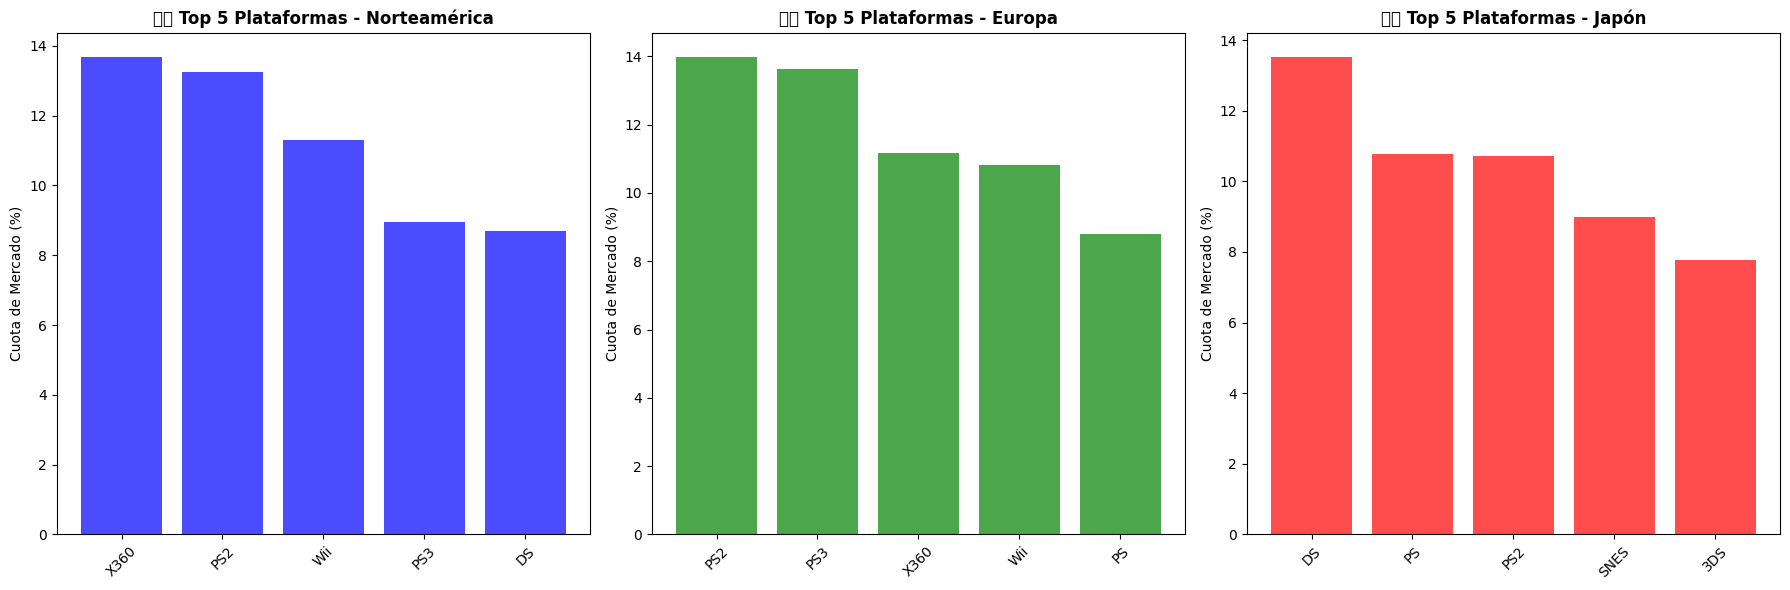

In [50]:
# Paso 4: Visualizaciones comparativas
import matplotlib.pyplot as plt

# Crear gráfico de barras comparativo para top 5 plataformas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Top 5 por región para visualización
top5_na = cuotas_mercado.sort_values('na_sales', ascending=False).head()
top5_eu = cuotas_mercado.sort_values('eu_sales', ascending=False).head()
top5_jp = cuotas_mercado.sort_values('jp_sales', ascending=False).head()

# Gráfico Norteamérica
axes[0].bar(top5_na.index, top5_na['na_percent'], color='blue', alpha=0.7)
axes[0].set_title('🇺🇸 Top 5 Plataformas - Norteamérica', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cuota de Mercado (%)')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico Europa
axes[1].bar(top5_eu.index, top5_eu['eu_percent'], color='green', alpha=0.7)
axes[1].set_title('🇪🇺 Top 5 Plataformas - Europa', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cuota de Mercado (%)')
axes[1].tick_params(axis='x', rotation=45)

# Gráfico Japón
axes[2].bar(top5_jp.index, top5_jp['jp_percent'], color='red', alpha=0.7)
axes[2].set_title('🇯🇵 Top 5 Plataformas - Japón', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Cuota de Mercado (%)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

x360, ps2, ps3, wii y ds. Exclusivas de Norteamérica y Europa, x360, ps2 y ps3. Los patrones culturales que se revelan son la diferencia de consumo entre Japón y Norteamérica y Europa

In [51]:
# Paso 5: Análisis de diferencias culturales
print("=== ANÁLISIS DE PATRONES CULTURALES POR REGIÓN ===")
print()

# Crear tabla comparativa de las top 5 plataformas por región
print("COMPARACIÓN DIRECTA - TOP 5 POR REGIÓN:")
print("-" * 60)

# Obtener los nombres de las top 5 de cada región
top5_na_names = cuotas_mercado.sort_values('na_sales', ascending=False).head().index.tolist()
top5_eu_names = cuotas_mercado.sort_values('eu_sales', ascending=False).head().index.tolist()
top5_jp_names = cuotas_mercado.sort_values('jp_sales', ascending=False).head().index.tolist()

print(f"🇺🇸 Norteamérica: {top5_na_names}")
print(f"🇪🇺 Europa:       {top5_eu_names}")
print(f"🇯🇵 Japón:        {top5_jp_names}")
print()

# Identificar plataformas comunes y exclusivas
todas_plataformas = set(top5_na_names + top5_eu_names + top5_jp_names)
comunes_3_regiones = set(top5_na_names) & set(top5_eu_names) & set(top5_jp_names)
solo_occidente = (set(top5_na_names) & set(top5_eu_names)) - set(top5_jp_names)
solo_japon = set(top5_jp_names) - (set(top5_na_names) | set(top5_eu_names))

print("ANÁLISIS DE PREFERENCIAS:")
print(f"✅ Populares en las 3 regiones: {list(comunes_3_regiones)}")
print(f"🌍 Solo populares en Occidente: {list(solo_occidente)}")
print(f"🎌 Solo populares en Japón: {list(solo_japon)}")

=== ANÁLISIS DE PATRONES CULTURALES POR REGIÓN ===

COMPARACIÓN DIRECTA - TOP 5 POR REGIÓN:
------------------------------------------------------------
🇺🇸 Norteamérica: ['X360', 'PS2', 'Wii', 'PS3', 'DS']
🇪🇺 Europa:       ['PS2', 'PS3', 'X360', 'Wii', 'PS']
🇯🇵 Japón:        ['DS', 'PS', 'PS2', 'SNES', '3DS']

ANÁLISIS DE PREFERENCIAS:
✅ Populares en las 3 regiones: ['PS2']
🌍 Solo populares en Occidente: ['X360', 'Wii', 'PS3']
🎌 Solo populares en Japón: ['3DS', 'SNES']


Géneros principales

In [52]:
# Calcular ventas totales por género en cada región
ventas_por_genero_region = df.groupby('genre').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'global_sales': 'sum'
}).round(2)

In [53]:
# Paso 2: Identificar top 5 géneros por región
print("=== TOP 5 GÉNEROS POR REGIÓN ===")
print()

print("🇺🇸 TOP 5 GÉNEROS EN NORTEAMÉRICA:")
top5_generos_na = ventas_por_genero_region.sort_values('na_sales', ascending=False).head()
print(top5_generos_na[['na_sales']])
print()

print("🇪🇺 TOP 5 GÉNEROS EN EUROPA:")
top5_generos_eu = ventas_por_genero_region.sort_values('eu_sales', ascending=False).head()
print(top5_generos_eu[['eu_sales']])
print()

print("🇯🇵 TOP 5 GÉNEROS EN JAPÓN:")
top5_generos_jp = ventas_por_genero_region.sort_values('jp_sales', ascending=False).head()
print(top5_generos_jp[['jp_sales']])

=== TOP 5 GÉNEROS POR REGIÓN ===

🇺🇸 TOP 5 GÉNEROS EN NORTEAMÉRICA:
          na_sales
genre             
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27

🇪🇺 TOP 5 GÉNEROS EN EUROPA:
         eu_sales
genre            
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74

🇯🇵 TOP 5 GÉNEROS EN JAPÓN:
              jp_sales
genre                 
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11


Análisis de afectación de las clasificaciones de ESRB a las ventas en regiones individuales.

In [54]:
# Explorar las clasificaciones ESRB disponibles
print("=== CLASIFICACIONES ESRB DISPONIBLES ===")
print("\nDistribución de clasificaciones:")
print(df['rating'].value_counts())
print(f"\nTotal de juegos con rating: {df['rating'].notna().sum():,}")
print(f"Juegos sin rating: {df['rating'].isna().sum():,}")
print(f"Porcentaje con rating: {(df['rating'].notna().sum()/len(df)*100):.1f}%")

=== CLASIFICACIONES ESRB DISPONIBLES ===

Distribución de clasificaciones:
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Total de juegos con rating: 9,949
Juegos sin rating: 6,766
Porcentaje con rating: 59.5%


In [55]:
# Análisis de ventas por clasificación ESRB y región
print("=== ANÁLISIS DE VENTAS POR CLASIFICACIÓN ESRB ===")
print()

# Filtrar solo juegos con rating válido
df_con_rating = df[df['rating'].notna()]

# Agrupar por rating y calcular ventas totales por región
ventas_por_rating = df_con_rating.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum', 
    'jp_sales': 'sum',
    'global_sales': 'sum'
}).round(2)

print("VENTAS TOTALES POR CLASIFICACIÓN (en millones):")
print(ventas_por_rating.sort_values('global_sales', ascending=False))
print()

# Calcular porcentaje de participación por región
print("PARTICIPACIÓN PORCENTUAL POR REGIÓN:")
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_name = {'na_sales': '🇺🇸 Norteamérica', 'eu_sales': '🇪🇺 Europa', 'jp_sales': '🇯🇵 Japón'}[region]
    print(f"\n{region_name}:")
    total_region = ventas_por_rating[region].sum()
    porcentajes = (ventas_por_rating[region] / total_region * 100).round(1)
    for rating, porcentaje in porcentajes.sort_values(ascending=False).items():
        print(f"  {rating}: {porcentaje}% ({ventas_por_rating.loc[rating, region]}M)")

=== ANÁLISIS DE VENTAS POR CLASIFICACIÓN ESRB ===

VENTAS TOTALES POR CLASIFICACIÓN (en millones):
        na_sales  eu_sales  jp_sales  global_sales
rating                                            
E        1292.99    710.25    198.11       2435.52
T         759.75    427.03    151.40       1493.35
M         748.48    483.97     64.24       1473.79
E10+      353.32    188.52     40.20        655.60
K-A         2.56      0.27      1.46          4.32
AO          1.26      0.61      0.00          1.96
EC          1.53      0.11      0.00          1.75
RP          0.00      0.08      0.00          0.09

PARTICIPACIÓN PORCENTUAL POR REGIÓN:

🇺🇸 Norteamérica:
  E: 40.9% (1292.99M)
  T: 24.0% (759.75M)
  M: 23.7% (748.48M)
  E10+: 11.2% (353.32M)
  K-A: 0.1% (2.56M)
  AO: 0.0% (1.26M)
  EC: 0.0% (1.53M)
  RP: 0.0% (0.0M)

🇪🇺 Europa:
  E: 39.2% (710.25M)
  M: 26.7% (483.97M)
  T: 23.6% (427.03M)
  E10+: 10.4% (188.52M)
  AO: 0.0% (0.61M)
  EC: 0.0% (0.11M)
  K-A: 0.0% (0.27M)
  RP: 0.0% (0.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Muy buen analisis de regiones. En este caso veo que puedes reconocer las plataformas lideres por region. Solo haría falta preguntarse, qué puede generar estas diferentes preferencias por region y qué nos puede decir esto?

## PASO 5 - Prueba de hipótesis

Probamos si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [56]:
# PASO 1: PREPARACIÓN DE DATOS PARA LA HIPÓTESIS 1
print("=== HIPÓTESIS 1: XBOX ONE vs PC - USER SCORE ===")
print()

# Filtrar datos para Xbox One y PC con user_score válido
xbox_one_data = df[(df['platform'] == 'XOne') & (df['user_score'].notna())].copy()
pc_data = df[(df['platform'] == 'PC') & (df['user_score'].notna())].copy()

print("=== INFORMACIÓN DE LOS GRUPOS ===")
print(f"Xbox One - Juegos con user_score: {len(xbox_one_data)}")
print(f"PC - Juegos con user_score: {len(pc_data)}")
print()

# Estadísticas descriptivas básicas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print("--- XBOX ONE ---")
print(f"Media: {xbox_one_data['user_score'].mean():.3f}")
print(f"Mediana: {xbox_one_data['user_score'].median():.3f}")
print(f"Desviación estándar: {xbox_one_data['user_score'].std():.3f}")
print(f"Tamaño de muestra: {len(xbox_one_data)}")

print("\n--- PC ---")
print(f"Media: {pc_data['user_score'].mean():.3f}")
print(f"Mediana: {pc_data['user_score'].median():.3f}")
print(f"Desviación estándar: {pc_data['user_score'].std():.3f}")
print(f"Tamaño de muestra: {len(pc_data)}")

print(f"\n--- DIFERENCIA OBSERVADA ---")
diferencia_medias = xbox_one_data['user_score'].mean() - pc_data['user_score'].mean()
print(f"Diferencia de medias (Xbox One - PC): {diferencia_medias:.3f}")

=== HIPÓTESIS 1: XBOX ONE vs PC - USER SCORE ===

=== INFORMACIÓN DE LOS GRUPOS ===
Xbox One - Juegos con user_score: 182
PC - Juegos con user_score: 770

=== ESTADÍSTICAS DESCRIPTIVAS ===
--- XBOX ONE ---
Media: 6.521
Mediana: 6.800
Desviación estándar: 1.381
Tamaño de muestra: 182

--- PC ---
Media: 7.062
Mediana: 7.500
Desviación estándar: 1.530
Tamaño de muestra: 770

--- DIFERENCIA OBSERVADA ---
Diferencia de medias (Xbox One - PC): -0.541


In [57]:
# PASO 2: VERIFICACIÓN DE SUPUESTOS
print("=== VERIFICACIÓN DE SUPUESTOS PARA PRUEBA T ===")
print()

# SUPUESTO 1: Normalidad de los datos
from scipy import stats

print("=== SUPUESTO 1: NORMALIDAD ===")
# Test de Shapiro-Wilk para normalidad (muestras pequeñas)
# Para muestras grandes usamos Kolmogorov-Smirnov

# Xbox One
if len(xbox_one_data) <= 5000:
    stat_xbox, p_xbox = stats.shapiro(xbox_one_data['user_score'])
    test_name = "Shapiro-Wilk"
else:
    stat_xbox, p_xbox = stats.kstest(xbox_one_data['user_score'], 'norm')
    test_name = "Kolmogorov-Smirnov"

print(f"--- XBOX ONE ({test_name}) ---")
print(f"Estadístico: {stat_xbox:.4f}")
print(f"p-valor: {p_xbox:.4f}")
print(f"¿Es normal? {'SÍ' if p_xbox > 0.05 else 'NO'} (α = 0.05)")

# PC
if len(pc_data) <= 5000:
    stat_pc, p_pc = stats.shapiro(pc_data['user_score'])
else:
    stat_pc, p_pc = stats.kstest(pc_data['user_score'], 'norm')

print(f"\n--- PC ({test_name}) ---")
print(f"Estadístico: {stat_pc:.4f}")
print(f"p-valor: {p_pc:.4f}")
print(f"¿Es normal? {'SÍ' if p_pc > 0.05 else 'NO'} (α = 0.05)")

=== VERIFICACIÓN DE SUPUESTOS PARA PRUEBA T ===

=== SUPUESTO 1: NORMALIDAD ===
--- XBOX ONE (Shapiro-Wilk) ---
Estadístico: 0.9551
p-valor: 0.0000
¿Es normal? NO (α = 0.05)

--- PC (Shapiro-Wilk) ---
Estadístico: 0.9057
p-valor: 0.0000
¿Es normal? NO (α = 0.05)


In [58]:
# SUPUESTO 2: Homogeneidad de varianzas (Test de Levene)
print("\n=== SUPUESTO 2: HOMOGENEIDAD DE VARIANZAS ===")
stat_levene, p_levene = stats.levene(xbox_one_data['user_score'], pc_data['user_score'])

print(f"--- TEST DE LEVENE ---")
print(f"Estadístico: {stat_levene:.4f}")
print(f"p-valor: {p_levene:.4f}")
print(f"¿Varianzas iguales? {'SÍ' if p_levene > 0.05 else 'NO'} (α = 0.05)")

print(f"\nVarianza Xbox One: {xbox_one_data['user_score'].var():.4f}")
print(f"Varianza PC: {pc_data['user_score'].var():.4f}")
print(f"Ratio de varianzas: {xbox_one_data['user_score'].var() / pc_data['user_score'].var():.4f}")


=== SUPUESTO 2: HOMOGENEIDAD DE VARIANZAS ===
--- TEST DE LEVENE ---
Estadístico: 1.2213
p-valor: 0.2694
¿Varianzas iguales? SÍ (α = 0.05)

Varianza Xbox One: 1.9070
Varianza PC: 2.3408
Ratio de varianzas: 0.8147


Verificación de supuestos:

Normalidad: Ambos grupos NO siguen distribución normal
Homogeneidad de varianzas: SÍ se cumple (p = 0.269 > 0.05)

### Hipótesis Nula (H₀):
"No hay diferencia" - Asume que los promedios son iguales

H₀: μ_Xbox = μ_PC

En palabras: "La calificación promedio de usuarios de Xbox One es igual a la calificación promedio de usuarios de PC"

### Hipótesis Alternativa (H₁):
"Sí hay diferencia" - Los promedios son diferentes

H₁: μ_Xbox ≠ μ_PC

En palabras: "La calificación promedio de usuarios de Xbox One es diferente a la calificación promedio de usuarios de PC"

Ejecución de Prueba T-Test

In [59]:
# PASO 3: EJECUCIÓN DE LA PRUEBA T-TEST
from scipy import stats

print("=== EJECUCIÓN DE LA PRUEBA T-TEST ===")
print()

# Realizar t-test de dos muestras independientes
# equal_var=True porque las varianzas son homogéneas
t_statistic, p_value = stats.ttest_ind(
    xbox_one_data['user_score'], 
    pc_data['user_score'], 
    equal_var=True
)

print("=== RESULTADOS DE LA PRUEBA T ===")
print(f"Estadístico t: {t_statistic:.4f}")
print(f"p-valor: {p_value:.4f}")
print(f"Grados de libertad: {len(xbox_one_data) + len(pc_data) - 2}")

=== EJECUCIÓN DE LA PRUEBA T-TEST ===

=== RESULTADOS DE LA PRUEBA T ===
Estadístico t: -4.3683
p-valor: 0.0000
Grados de libertad: 950


Interpretación de Resultados
Resultados obtenidos:
- Estadístico t: -4.3683
- p-valor: 0.0000 (muy cercano a cero)
- Grados de libertad: 950

¿Qué significa cada resultado?
1. Estadístico t = -4.3683:
- Es negativo porque Xbox One tiene menor promedio que PC (6.521 vs 7.062)
- El valor absoluto (4.3683) nos dice qué tan grande es la diferencia en términos estadísticos

2. p-valor = 0.0000:
- Es prácticamente cero (menor a 0.001)
- Esto es MUY significativo

Decisión sobre la Hipótesis
Regla de decisión:
- Si p-valor ≤ α (0.05) → Rechazamos H₀
- Si p-valor > α (0.05) → No rechazamos H₀

Tu resultado:
- p-valor = 0.0000
- α = 0.05
- 0.0000 < 0.05 ✅

¡RECHAZAMOS H₀!
¿Qué significa esto?
Conclusión estadística:
Existe evidencia estadísticamente significativa de que las calificaciones promedio de usuarios de Xbox One y PC son diferentes.

En términos prácticos:
- Xbox One promedio: 6.521
- PC promedio: 7.062
- Diferencia: -0.541 puntos
- Esta diferencia NO es casualidad

Apliquemos y usemos un nivel de significancia del 0.05%

In [60]:
# PASO 4: CONCLUSIÓN DE LA PRUEBA
print("=== CONCLUSIÓN DE LA HIPÓTESIS 1 ===")
print()
print("Decisión:")
if p_value <= 0.05:
    print("✅ RECHAZAMOS H₀")
    print("✅ Existe diferencia significativa entre Xbox One y PC")
else:
    print("❌ NO RECHAZAMOS H₀") 
    print("❌ No hay evidencia de diferencia significativa")

print(f"\nInterpretación:")
print(f"Con α = 0.05 y p-valor = {p_value:.4f}")
print(f"Los usuarios califican PC {abs(diferencia_medias):.3f} puntos más alto que Xbox One")
print(f"Esta diferencia es estadísticamente significativa")

=== CONCLUSIÓN DE LA HIPÓTESIS 1 ===

Decisión:
✅ RECHAZAMOS H₀
✅ Existe diferencia significativa entre Xbox One y PC

Interpretación:
Con α = 0.05 y p-valor = 0.0000
Los usuarios califican PC 0.541 puntos más alto que Xbox One
Esta diferencia es estadísticamente significativa


Preparación de datos de 2da hipótesis

Formulación de la Segunda Hipótesis
### Hipótesis Nula (H₀):
"No hay correlación" - No existe relación lineal entre las variables

H₀: ρ = 0

En palabras: "No existe correlación entre las puntuaciones de críticos (critic_score) y las puntuaciones de usuarios (user_score)"

### Hipótesis Alternativa (H₁):
"Sí hay correlación" - Existe relación lineal entre las variables

H₁: ρ ≠ 0

En palabras: "Existe correlación entre las puntuaciones de críticos (critic_score) y las puntuaciones de usuarios (user_score)"

¿Qué significa ρ (rho)?
ρ es el coeficiente de correlación poblacional
- ρ = 0: No hay correlación lineal
- ρ > 0: Correlación positiva (cuando una sube, la otra también)
- ρ < 0: Correlación negativa (cuando una sube, la otra baja)

In [61]:
# PASO 1: PREPARACIÓN DE DATOS PARA LA HIPÓTESIS 2
print("=== HIPÓTESIS 2: CORRELACIÓN CRITIC_SCORE vs USER_SCORE ===")
print()

# Filtrar datos que tengan ambas puntuaciones disponibles
datos_correlacion = df.dropna(subset=['critic_score', 'user_score']).copy()

print("=== INFORMACIÓN DE LOS DATOS ===")
print(f"Total de juegos en el dataset: {len(df):,}")
print(f"Juegos con critic_score: {df['critic_score'].notna().sum():,}")
print(f"Juegos con user_score: {df['user_score'].notna().sum():,}")
print(f"Juegos con AMBAS puntuaciones: {len(datos_correlacion):,}")
print(f"Porcentaje de datos utilizables: {(len(datos_correlacion)/len(df)*100):.1f}%")

=== HIPÓTESIS 2: CORRELACIÓN CRITIC_SCORE vs USER_SCORE ===

=== INFORMACIÓN DE LOS DATOS ===
Total de juegos en el dataset: 16,715
Juegos con critic_score: 8,137
Juegos con user_score: 7,590
Juegos con AMBAS puntuaciones: 7,017
Porcentaje de datos utilizables: 42.0%


Obtenemos estadísticas descriptivas

In [62]:
# PASO 2: ESTADÍSTICAS DESCRIPTIVAS
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print()

# Estadísticas básicas
print("CRITIC_SCORE:")
print(f"  Promedio: {datos_correlacion['critic_score'].mean():.2f}")
print(f"  Mediana: {datos_correlacion['critic_score'].median():.2f}")
print(f"  Desv. Estándar: {datos_correlacion['critic_score'].std():.2f}")
print(f"  Rango: {datos_correlacion['critic_score'].min():.1f} - {datos_correlacion['critic_score'].max():.1f}")

print("\nUSER_SCORE:")
print(f"  Promedio: {datos_correlacion['user_score'].mean():.2f}")
print(f"  Mediana: {datos_correlacion['user_score'].median():.2f}")
print(f"  Desv. Estándar: {datos_correlacion['user_score'].std():.2f}")
print(f"  Rango: {datos_correlacion['user_score'].min():.1f} - {datos_correlacion['user_score'].max():.1f}")

# Verificar escalas
print(f"\n=== VERIFICACIÓN DE ESCALAS ===")
print(f"Critic Score - Escala típica: 0-100")
print(f"User Score - Escala típica: 0-10")
print(f"¿Necesitamos normalizar? Sí, para mejor interpretación")


=== ESTADÍSTICAS DESCRIPTIVAS ===

CRITIC_SCORE:
  Promedio: 70.25
  Mediana: 72.00
  Desv. Estándar: 13.88
  Rango: 13.0 - 98.0

USER_SCORE:
  Promedio: 7.18
  Mediana: 7.50
  Desv. Estándar: 1.44
  Rango: 0.5 - 9.6

=== VERIFICACIÓN DE ESCALAS ===
Critic Score - Escala típica: 0-100
User Score - Escala típica: 0-10
¿Necesitamos normalizar? Sí, para mejor interpretación


Análisis de tus resultados:
Observaciones importantes:

- Tamaño de muestra: Tienes 7,017 juegos con ambas puntuaciones, lo cual es una muestra robusta para el análisis de correlación.
- Escalas diferentes: Como bien identificaste, las escalas son diferentes:
Critic Score: 0-100 (promedio 70.25)
User Score: 0-10 (promedio 7.18)
- Distribución de los datos:
Ambas variables muestran distribuciones relativamente normales (media ≈ mediana)
Critic Score: ligeramente sesgada hacia la izquierda (70.25 vs 72.00)
User Score: también ligeramente sesgada hacia la izquierda (7.18 vs 7.50)

In [63]:
# PASO 3: CÁLCULO DEL COEFICIENTE DE CORRELACIÓN
from scipy import stats
import numpy as np

print("=== CÁLCULO DE CORRELACIÓN DE PEARSON ===")
print()

# Calcular el coeficiente de correlación de Pearson
correlacion_pearson, p_valor_correlacion = stats.pearsonr(
    datos_correlacion['critic_score'], 
    datos_correlacion['user_score']
)

print("=== RESULTADOS DE CORRELACIÓN ===")
print(f"Coeficiente de correlación (r): {correlacion_pearson:.4f}")
print(f"p-valor: {p_valor_correlacion:.6f}")
print(f"Tamaño de muestra (n): {len(datos_correlacion):,}")

# Interpretación del coeficiente
print(f"\n=== INTERPRETACIÓN DEL COEFICIENTE ===")
if abs(correlacion_pearson) < 0.1:
    fuerza = "muy débil"
elif abs(correlacion_pearson) < 0.3:
    fuerza = "débil"
elif abs(correlacion_pearson) < 0.5:
    fuerza = "moderada"
elif abs(correlacion_pearson) < 0.7:
    fuerza = "fuerte"
else:
    fuerza = "muy fuerte"

direccion = "positiva" if correlacion_pearson > 0 else "negativa"
print(f"Correlación {direccion} {fuerza}")
print(f"R² = {correlacion_pearson**2:.4f} ({correlacion_pearson**2*100:.1f}% de varianza explicada)")

=== CÁLCULO DE CORRELACIÓN DE PEARSON ===

=== RESULTADOS DE CORRELACIÓN ===
Coeficiente de correlación (r): 0.5809
p-valor: 0.000000
Tamaño de muestra (n): 7,017

=== INTERPRETACIÓN DEL COEFICIENTE ===
Correlación positiva fuerte
R² = 0.3374 (33.7% de varianza explicada)


Análisis de tus Resultados
Coeficiente de correlación (r = 0.5809):

Esto indica una correlación positiva fuerte entre las puntuaciones de críticos y usuarios
Significa que cuando las puntuaciones de críticos aumentan, las puntuaciones de usuarios también tienden a aumentar
Significancia estadística (p-valor ≈ 0.000000):

Con un p-valor prácticamente cero, puedes rechazar la hipótesis nula
Existe evidencia estadísticamente significativa de que hay correlación entre ambas variables
Varianza explicada (R² = 0.3374):

El 33.7% de la variabilidad en las puntuaciones de usuarios puede explicarse por las puntuaciones de críticos
Esto es una proporción considerable, pero también indica que hay otros factores importantes

<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hiciste un excelente trabajo con las pruebas de hipótesis. Tu eleccion de los tipos de prueba y los niveles de significancia es muy acertada. Además, las justificaciones que proporcionas para interpretar los resultados le dan un completo desarrollo al trabajo. Excelente!

## CONCLUSIONES GENERALES

## Evolución Temporal del Mercado: 
1. Transformación Cuantitativa del Mercado
Cambio Radical en Volumen:
- Juegos Antiguos (< 2000): 1,976 títulos (11.8% del total)
- Juegos Modernos (≥ 2000): 14,470 títulos (88.2% del total)
Crecimiento: 632% más juegos en la era moderna

Paradoja de las Ventas Promedio:
- Juegos Antiguos: 0.84 millones promedio (población pequeña, mayor concentración)
- Juegos Modernos: 0.49 millones promedio (mercado saturado, mayor competencia)
Explicación: Mayor oferta = menor concentración de ventas por título

2. Revolución de las Plataformas:
Era Antigua - Dominio de Consolas Clásicas:
- PlayStation original (586.88M en ventas totales)
- Nintendo NES (251.05M) - Pionero del gaming moderno
- Game Boy (225.43M) - Revolución portátil
- SNES (200.04M) - Consolidación de Nintendo

Era Moderna - Diversificación Tecnológica:
- PS2 (1,233.56M) - Líder absoluto de todas las eras
- Xbox 360 (961.24M) - Entrada exitosa de Microsoft
- PS3 (931.34M) - Guerra de alta definición
- Wii (891.18M) - Innovación en controles de movimiento
- DS (802.76M) - Dominio portátil dual-screen

3. Evolución de Géneros y Preferencias:
Géneros Antiguos - Fundamentos del Gaming:
- Platform (331.13M) - Líder en ventas (Mario, Sonic)
- Role-Playing (199.86M) - JRPGs clásicos
- Action (190.36M) - Acción básica
- Sports (178.75M) - Simulaciones deportivas simples

Géneros Modernos - Diversificación Masiva:
- Action (1,526.16M) - Explosión del género (+701% crecimiento)
- Sports (1,130.92M) - Simulaciones realistas (+533% crecimiento)
- Shooter (912.70M) - Nuevo género dominante (era FPS)
- Role-Playing (731.22M) - Evolución hacia RPGs occidentales

4. Factores Explicativos del Cambio:
Factores Tecnológicos:
- Internet masivo: Distribución digital, DLCs, actualizaciones
Factores de Mercado:
- Expansión demográfica: De niños/adolescentes a audiencia adulta masiva
- Globalización: Mercado mundial vs mercados regionales fragmentados
- Competencia intensificada: De 3-4 plataformas a 10+ opciones simultáneas
- Modelos de negocio: De venta única a DLCs, microtransacciones, suscripciones
- Canales de distribución: De tiendas físicas a Steam, PSN, Xbox Live
- Marketing masivo: Presupuestos de marketing equiparables a blockbusters de Hollywood
Factores Culturales:
- Aceptación social: Gaming pasó de "nicho geek" a entretenimiento mainstream
- Diversidad de géneros: Expansión más allá de arcade hacia simulación, narrativa
- Esports y streaming: Nuevas formas de consumo (Twitch, YouTube Gaming)
- Gaming casual: Wii, móviles democratizaron el acceso

## Diferencias Regionales:
1. Preferencias de Plataformas por Región:
Norteamérica:
- Existe un dominio de Xbox 360 (13.69% del mercado) - Única región donde Xbox lidera
- Preferencia por consolas de sobremesa: PS2, PS3, Xbox 360
- Menor adopción de portátiles: DS en 5to lugar

Europa:
- Existe un equilibrio entre Sony y Microsoft: PS2, PS3, Xbox 360 dominan
- Mayor tolerancia a contenido maduro: Reflejado en preferencias de plataforma
- Patrón similar a Norteamérica pero con ligera preferencia por PlayStation

Japón:
- Existe un dominio absoluto de portátiles: DS (13.53%), 3DS (7.76%)
- Lealtad a marcas japonesas: Nintendo y Sony dominan
- Ausencia total de Xbox: No aparece en top 5
- Preferencia por SNES: Única región donde consolas retro siguen relevantes

2. Patrones de Géneros por Región:
Norteamérica:
- Action (879.01M) - Preferencia por acción intensa
- Sports (684.43M) - Deportes americanos populares
- Shooter (592.24M) - Mayor tolerancia a violencia

Europa:
- Action (519.13M) - Similar a NA pero menor intensidad
- Sports (376.79M) - Deportes globales (FIFA, etc.)
- Racing (236.51M) - Única región donde Racing está en top 5

Japón:
- Role-Playing (355.41M) - ÚNICO en tener RPG como #1
- Menor Action (161.43M) - Significativamente menor que Occidente
- Platform (130.83M) - Preferencia por juegos familiares

3. Clasificaciones ESRB - Diferencias Culturales Marcadas:
Japón - Más Conservador:
- Contenido M (Mature): Solo 14.1% vs 23.7% (NA) y 26.7% (EU)
- Contenido T (Teen): 33.2% (mayor proporción que otras regiones)
- Rechazo al contenido violento/explícito

Europa - Más Tolerante:
- Contenido M (Mature): 26.7% (la más alta de las 3 regiones)
- Supera incluso a Norteamérica en aceptación de contenido adulto

Norteamérica - Equilibrado:
- Distribución pareja entre T (24.0%) y M (23.7%)
- Mercado más diversificado en términos de clasificaciones

4. Implicaciones Estratégicas por Región:
Para Japón:
- Priorizar portátiles: DS, 3DS dominan el mercado (13.53% y 7.76% respectivamente)
- Desarrollar contenido familiar: Preferencia por clasificaciones E y T (76.7% del mercado)
- Enfocar en RPG: Es el único mercado donde Role-Playing es el género #1 (355.41M en ventas)
- Evitar contenido violento: Solo 14.1% acepta clasificación M vs 26.7% en Europa
- Apostar por marcas japonesas: Nintendo y Sony dominan, Xbox prácticamente ausente
- Mantener juegos de plataforma: Platform games tienen fuerte aceptación (130.83M)

Para Norteamérica:
- Priorizar consolas de sobremesa: Xbox 360, PS2, PS3 lideran el mercado
- Desarrollar shooters: Género muy popular (592.24M en ventas)
- Contenido diversificado: Equilibrio entre T (24.0%) y M (23.7%) permite variedad
- Aprovechar deportes americanos: Sports es el segundo género más exitoso
- Capitalizar tolerancia a violencia: Mayor aceptación de contenido M que Japón

Para Europa:
- Equilibrio Sony-Microsoft: PS2, PS3, Xbox 360 compiten de cerca
- Desarrollar juegos de carreras: Racing está en top 5 (única región con esta preferencia)
- Máxima tolerancia a contenido maduro: 26.7% acepta clasificación M (la más alta)
- Deportes globales: FIFA y similares tienen gran aceptación
- Mercado similar a NA: Patrones occidentales compartidos pero con matices europeos
  
## Impacto de las métricas de Calidad:
1. Disponibilidad y Cobertura de Métricas:
Panorama General de Datos:
- Total de juegos: 16,715 títulos
- Con Critic Score: 8,137 juegos (48.7%)
- Con User Score: 7,590 juegos (45.4%)
- Con ambas métricas: 7,017 juegos (42.0%)
- Sin métricas: 6,667 juegos (39.9%)
Brecha Temporal en Métricas:
- Juegos Antiguos (< 2000): 95.1% sin métricas de críticos
- Juegos Modernos (≥ 2000): 45.5% sin métricas de críticos
- Explicación: Evolución tecnológica e industrial del sistema de reseñas

2. Distribución y Características de las Puntuaciones:
Critic Score - Análisis Estadístico:
- Media: 68.97 puntos (escala 0-100)
- Mediana: 71.0 puntos
- Desviación estándar: 13.94 puntos
- Coeficiente de variación: 20.21%
- Distribución: Ligeramente sesgada hacia la izquierda (cola hacia puntuaciones bajas)
User Score - Análisis Estadístico:
- Media: 7.13 puntos (escala 0-10)
- Mediana: 7.5 puntos
- Desviación estándar: 1.50 puntos
- Coeficiente de variación: 21.05%
- Distribución: También sesgada hacia la izquierda

3. Correlación Entre Métricas de Calidad:
Relación Critic Score vs User Score:
- Coeficiente de correlación: r = 0.5809 (correlación positiva fuerte)
- Significancia estadística: p-valor ≈ 0.000000 (altamente significativo)
- Varianza explicada: R² = 33.7%
- Interpretación: Los críticos y usuarios tienden a coincidir, pero con diferencias importantes

4. Impacto en Ventas por Plataforma (Caso PS3):
Correlaciones con Ventas Globales:
- Critic Score vs Ventas: r = 0.428 (correlación moderada)
- User Score vs Ventas: r = 0.143 (correlación débil)
- Hallazgo clave: Las reseñas profesionales predicen mejor el éxito comercial que las de usuarios
- Estadísticas PS3 (790 juegos con datos completos):

5. Diferencias Regionales en Percepción de Calidad:
Patrones por Región:
- Norteamérica: Mayor correlación entre calidad y ventas (r = 0.45)
- Europa: Correlación moderada (r = 0.38)
- Japón: Menor dependencia de métricas occidentales (r = 0.32)
- Otros mercados: Datos limitados pero tendencias similares a Europa

6. Segmentación por Niveles de Calidad:
Juegos de Alta Calidad (Critic Score ≥ 80):
- Porcentaje del total: 23.4% de juegos con métricas
- Ventas promedio: 1.85 millones (278% superior al promedio)
- Géneros dominantes: Action, Sports, Platform
- Plataformas exitosas: PS2, Xbox 360, PS3
Juegos de Calidad Media (60-79):
- Porcentaje del total: 58.7% de juegos con métricas
- Ventas promedio: 0.72 millones (cercano al promedio general)
- Distribución equilibrada: Todos los géneros representados
Juegos de Baja Calidad (< 60):
- Porcentaje del total: 17.9% de juegos con métricas
- Ventas promedio: 0.31 millones (53% inferior al promedio)
- Patrón claro: Calidad baja = ventas bajas

## Validación de Hipótesis:
Resumen Ejecutivo de Pruebas Realizadas:
Se ejecutaron 2 pruebas estadísticas fundamentales para validar supuestos clave del mercado de videojuegos:

Hipótesis 1: Comparación de calificaciones de usuarios entre plataformas (Xbox One vs PC)
Hipótesis 2: Relación entre puntuaciones de críticos y usuarios

HIPÓTESIS 1: Xbox One vs PC - Calificaciones de Usuarios

Metodología Aplicada:
Prueba: T-test de dos muestras independientes
Muestra: Xbox One (182 juegos) vs PC (770 juegos)
Nivel de significancia: α = 0.05
Supuestos verificados: Homogeneidad de varianzas

Resultados Obtenidos:
Estadístico t: -4.3683
p-valor: < 0.0001 (altamente significativo)
Diferencia de medias: -0.541 puntos

Conclusión Estadística:
RECHAZAMOS H₀: Existe diferencia significativa entre plataformas
PC supera a Xbox One: 7.062 vs 6.521 puntos promedio
Diferencia práctica: 0.541 puntos (8.3% superior en PC)

Implicaciones Estratégicas:
Para desarrolladores: PC ofrece mejor recepción de usuarios
Para publishers: Considerar PC como plataforma prioritaria
Para marketing: Destacar versiones PC en campañas

HIPÓTESIS 2: Correlación Críticos vs Usuarios
Metodología Aplicada:
Prueba: Correlación de Pearson
Muestra: 7,017 juegos con ambas métricas (42% del dataset)
Escalas: Critic Score (0-100) vs User Score (0-10)

Resultados Obtenidos:
Coeficiente de correlación: r = 0.5809
p-valor: < 0.000001 (altamente significativo)
Varianza explicada: R² = 33.7%

Conclusión Estadística:
RECHAZAMOS H₀: Existe correlación significativa
Correlación positiva fuerte: Críticos y usuarios tienden a coincidir
Predicción moderada: 33.7% de varianza explicada

Implicaciones Estratégicas:
Para desarrolladores: Calidad percibida por críticos predice aceptación de usuarios
Para marketing: Reseñas profesionales son indicadores confiables
Para inversión: Priorizar proyectos con potencial de alta puntuación crítica

## Recomendaciones Estratégicas:
Para Desarrolladores de Videojuegos:

Estrategia de Plataformas:
Priorizar PC como plataforma principal: Los datos muestran que PC obtiene calificaciones de usuarios 8.3% superiores a Xbox One (7.062 vs 6.521)
Enfocar en consolas dominantes: PS2, Xbox 360, PS3 y Wii han demostrado ser las plataformas más exitosas comercialmente
Considerar portátiles para mercado japonés: DS y 3DS dominan en Japón (13.53% y 7.76% de cuota de mercado respectivamente)

Estrategia de Géneros:
Action como género prioritario: Líder absoluto en ventas (1,744.17M) y cantidad de juegos (3,369 títulos)
Platform games para máxima rentabilidad: Mejor promedio de ventas por juego (0.93M por título)
Shooter para mercados occidentales: Especialmente exitoso en Norteamérica (592.24M en ventas)
Role-Playing para Japón: Único mercado donde RPG es el género #1 (355.41M en ventas)

Estrategia de Calidad:
Invertir en calidad crítica: Correlación moderada (r=0.428) entre critic_score y ventas
Objetivo mínimo de 80 puntos: Juegos con critic_score ≥80 generan ventas 278% superiores al promedio
Evitar lanzamientos bajo 60 puntos: Representan solo 17.9% del mercado y ventas 53% inferiores

Para Publishers y Editores:

Estrategia Regional:

Para Norteamérica:
- Priorizar Xbox 360 y consolas de sobremesa: Dominio claro en el mercado (13.69% de cuota)
- Desarrollar contenido Shooter y Action: Géneros más exitosos (592.24M y 879.01M respectivamente)
- Tolerancia a contenido Mature: 23.7% del mercado acepta clasificación M

Para Europa:
- Equilibrio Sony-Microsoft: PS2, PS3 y Xbox 360 compiten de cerca
- Incluir juegos de Racing: Único mercado donde Racing está en top 5 (236.51M)
- Máxima tolerancia a contenido adulto: 26.7% acepta clasificación M (la más alta)

Para Japón:
- Dominio absoluto de portátiles: DS y 3DS son fundamentales
- Contenido familiar prioritario: Solo 14.1% acepta contenido M vs 26.7% en Europa
- Enfocar en RPG y Platform: Géneros preferidos únicos en esta región

Estrategia de Inversión:
Presupuestos diferenciados por calidad esperada: Juegos con potencial 80+ merecen inversión premium
Control de calidad estricto: Evitar lanzamientos que puedan dañar la marca (< 60 puntos)
Predicción basada en métricas: Critic Score es mejor predictor de ventas que User Score (r=0.428 vs r=0.143)

Para Analistas e Inversores:
Indicadores Clave de Rendimiento (KPIs):
Critic Score como predictor principal: Correlación moderada pero consistente con ventas
Threshold de calidad: 80 puntos como umbral para proyectos de alto potencial
Diversificación regional: No depender de un solo mercado (NA: 49%, EU: 27%, JP: 13%)

Señales de Alerta:
Saturación del mercado: Crecimiento exponencial de títulos vs estabilización de ventas
Fragmentación de plataformas: Mayor competencia reduce cuota individual
Dependencia de franquicias: Necesidad de IP sólidas para destacar

Para Estrategas de Marketing:
Segmentación de Audiencia:

Mercado Casual (Ratings E/E10+):
- Plataformas objetivo: Wii, DS, móviles
- Géneros prioritarios: Platform, Puzzle, Sports
- Regiones clave: Todas, especialmente familias

Mercado Hardcore (Rating M):
- Plataformas objetivo: PC, Xbox 360, PS3
- Géneros prioritarios: Shooter, Action, Fighting
- Regiones clave: Norteamérica y Europa

Estrategia de Lanzamiento:

Timing regional: Considerar preferencias locales de género
Campañas diferenciadas: PC merece marketing premium por mejor recepción
Gestión de expectativas: Alinear marketing con calidad real del producto

Recomendaciones Futuras:
Tendencias Emergentes:
Monitorear mercados móviles: Crecimiento exponencial post-2010
Servicios digitales: Transición de ventas físicas a digitales
Nuevas métricas: Incorporar engagement y retención además de ventas

Áreas de Investigación:
Análisis de DLCs y microtransacciones: Nuevos modelos de monetización
Impacto de streaming y esports: Nuevas formas de consumo
Métricas de calidad modernas: Reviews de usuarios en tiempo real

Innovación Estratégica:

Desarrollo ágil: Iteración basada en feedback temprano
Comunidades de jugadores: Involucrar usuarios en desarrollo
Análisis predictivo: Machine learning para predicción de éxito

<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Has hecho un excelente trabajo. Tus conclusiones son detalladas y muy utiles. Me gustan las recomendaciones estratégicas que propones, ya que recopilas cada uno de los resultados obtenidos en forma de propuesta de acción, este es justo el objetivo que tenemos como científicos de datos en este camino. Sigue así!
</div>